<a href="https://colab.research.google.com/github/thepankaj018/EDA-Hotel-Booking/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to conduct an exploratory data analysis (EDA) on a dataset containing information on various aspects of hotel bookings. The dataset includes information on whether or not the booking was cancelled, how far in advance the booking was made, the arrival date, meal type, country, market segment, distribution channel, and whether or not the guest is a repeat customer. It also includes information on previous cancellations, previous bookings that were not cancelled, the type of room that was reserved and assigned, the number of booking changes, deposit type, agent details, days on waiting list, customer type, average daily rate (ADR), number of required parking spaces, number of special requests, reservation status, and the total number of people and the total stay.

The first step in the EDA process was to clean and preprocess the data. This involved checking for missing or inconsistent data, removing outliers and transforming variables as necessary. This step was crucial in ensuring that the final analysis was based on accurate and reliable data.

Once the data had been cleaned, the next step was to visualize the distributions of the different variables. This was done using various plots such as line plot, bar charts,count plot, and scatter plots. These visualizations helped to identify patterns and trends in the data and provided a good starting point for further analysis.

One of the key findings from the analysis was that most of the bookings made were not canceled. This suggests that most of the customers who made a reservation actually showed up and stayed at the hotel. Another interesting finding was that the majority of the bookings were made in the months of June and July. This is consistent with the idea that these months are typically the busiest travel months of the year. Additionally, the majority of the bookings were made in the country of Portugal, which indicates that the dataset is likely to be representative of hotel bookings in Portugal.

The most common market segment were Online TA and Offline TA/TO and the majority of the bookings were made through the TA/TO distribution channel. This suggests that most of the bookings were made by travel agents or tour operators, rather than individual customers. 

The majority of the bookings were made for a "A" room type, which is not surprising as standard rooms are typically the most common type of room offered by hotels. Additionally, the majority of the bookings were made by travel agents and the majority of the bookings were made with no deposit. This may indicate that travel agents and tour operators typically make bookings on behalf of their clients and that most clients are not required to make a deposit when making a reservation.

Overall, this EDA provided valuable insights into the characteristics of the hotel bookings in the dataset and helped to identify potential areas for further investigation. The dataset included rich information on different aspects of hotel booking which could help in understanding the booking trends and making data-driven decisions. Additionally, the findings from this analysis could be useful for hotel management and for those working in the tourism and travel industry, to understand the booking trends and make informed decisions.

# **GitHub Link -**

https://github.com/thepankaj018/EDA-Hotel-Booking.git

# **Problem Statement**


## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>



#### **Define Your Business Objective?**

###Explore and analyze the data to discover important factors that govern the bookings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns',None)

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
file_path = '/content/drive/MyDrive/hotel_bookings.csv'
df = pd.read_csv(file_path)


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Number of rows are {df.shape[0]}')
print(f'Number of columns are {df.shape[1]}')

Number of rows are 119390
Number of columns are 32


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f' Number of duplicates values in df are {df.duplicated().sum()}')

 Number of duplicates values in df are 31994


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Checking percent NULL Values
(df.isnull().sum()*100/len(df)).to_frame().sort_values(by = 0,ascending = False).rename(columns = {0:'Percent NULL Values'})

,Percent NULL Values
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
reserved_room_type,0.000000
assigned_room_type,0.000000
booking_changes,0.000000
deposit_type,0.000000
hotel,0.000000
previous_cancellations,0.000000


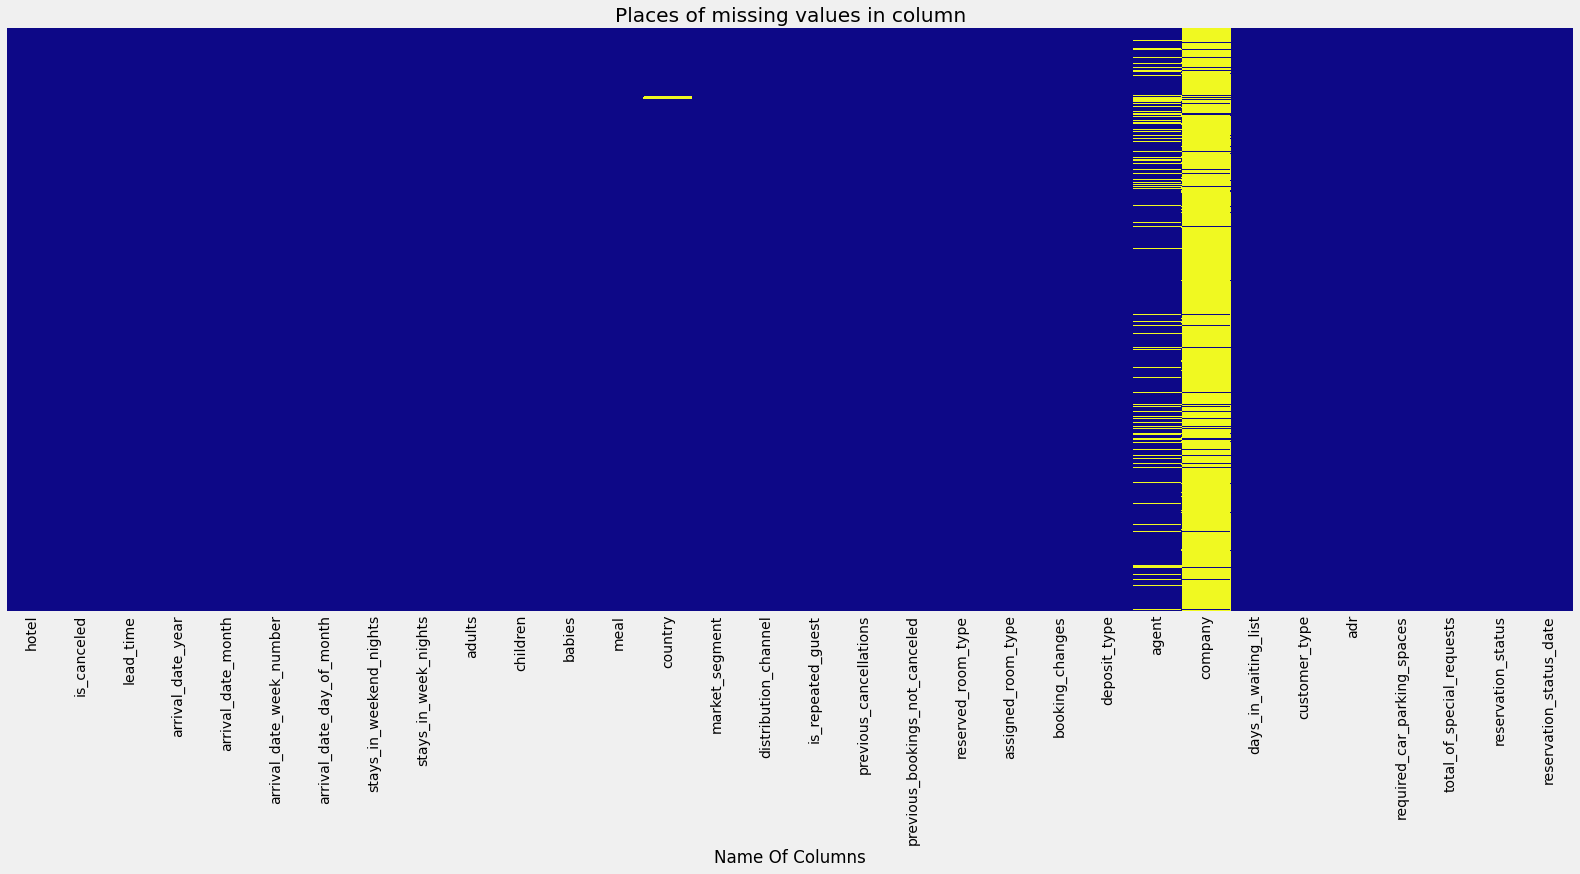

In [11]:
# Visualizing the missing values
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap = 'plasma')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column");

### What did you know about your dataset?

####1.Dataset has 119390 rows & 32 columns.
####2.Dataset has 31994 duplicates values.
####2.Feature "COMPANY" has highest number of NULL Values around 94% followed by AGENT that contains around 14% NULL Values.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.000000,0.370416,0.482918,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,119390.000000,104.011416,106.863097,0.000000,18.000000,69.000000,160.000000,737.000000
arrival_date_year,119390.000000,2016.156554,0.707476,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_week_number,119390.000000,27.165173,13.605138,1.000000,16.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,119390.000000,15.798241,8.780829,1.000000,8.000000,16.000000,23.000000,31.000000
stays_in_weekend_nights,119390.000000,0.927599,0.998613,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,119390.000000,2.500302,1.908286,0.000000,1.000000,2.000000,3.000000,50.000000
adults,119390.000000,1.856403,0.579261,0.000000,2.000000,2.000000,2.000000,55.000000
children,119386.000000,0.103890,0.398561,0.000000,0.000000,0.000000,0.000000,10.000000
babies,119390.000000,0.007949,0.097436,0.000000,0.000000,0.000000,0.000000,10.000000


### Variables Description 



1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for elem in df.columns:
  print(f'Unique Values present in {elem} are')
  print("-"*50)
  print(df[elem].unique())
  print("*"*100)

Unique Values present in hotel are
--------------------------------------------------
['Resort Hotel' 'City Hotel']
****************************************************************************************************
Unique Values present in is_canceled are
--------------------------------------------------
[0 1]
****************************************************************************************************
Unique Values present in lead_time are
--------------------------------------------------
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Removing duplicates values present in df
df.drop_duplicates(inplace = True)

In [16]:
print(f' Now number of duplicates values are {df.duplicated().sum()}')

 Now number of duplicates values are 0


In [17]:
# Droping column COMPANY which has 94% NULL Values.
df.drop(columns = ['company'],inplace = True)

In [18]:
# Filling NULL Values in column AGENT with 0.
# 0 indicates booking was not made by any agent instead done through some other channels.
df['agent'].fillna(value = 0 ,inplace = True)

In [19]:
# Filling NULL Values present in column CHILDREN with 0.
# 0 indicates no children present.
df['children'].fillna(value = 0,inplace = True)

In [20]:
# droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
df = df[df['adults'] + df['children'] + df['babies'] != 0]

In [21]:
# Filling NULL Values present in column COUNTRY with Mode 
# Repacing with mode because data is missing completely at random
df['country'] = df['country'].replace(np.NaN,df['country'].mode()[0])

In [22]:
# Extracting categorical columns
categorical = list(set(df.columns)-set(df.describe().columns))
categorical

['customer_type',
 'reserved_room_type',
 'meal',
 'market_segment',
 'deposit_type',
 'reservation_status',
 'reservation_status_date',
 'country',
 'assigned_room_type',
 'arrival_date_month',
 'distribution_channel',
 'hotel']

In [23]:
# Extracting Numerical columns
numerical = list(set(df.columns)-set(categorical))
numerical

['adults',
 'stays_in_week_nights',
 'is_repeated_guest',
 'booking_changes',
 'arrival_date_day_of_month',
 'required_car_parking_spaces',
 'previous_bookings_not_canceled',
 'arrival_date_week_number',
 'lead_time',
 'adr',
 'previous_cancellations',
 'children',
 'is_canceled',
 'babies',
 'total_of_special_requests',
 'arrival_date_year',
 'stays_in_weekend_nights',
 'days_in_waiting_list',
 'agent']

In [24]:
df.shape[1]

31

In [25]:
len(categorical) + len(numerical)

31

In [26]:
# Checking the unique values in categorical columns.
for elem in categorical:
  if elem in ['arrival_date_month','reservation_status_date','country']:
    continue
  else:
    print(f'Unique values in {elem} are {df[elem].unique()}')

Unique values in customer_type are ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in reserved_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in meal are ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in market_segment are ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in deposit_type are ['No Deposit' 'Refundable' 'Non Refund']
Unique values in reservation_status are ['Check-Out' 'Canceled' 'No-Show']
Unique values in assigned_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in distribution_channel are ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in hotel are ['Resort Hotel' 'City Hotel']


In [27]:
# Now doing some feature construction.
df['total_people'] = df['adults'] + df['children'] + df['babies']
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [28]:
# Dropping column
df.drop(columns = ['adults','children','babies','stays_in_week_nights','stays_in_weekend_nights'],inplace = True)

In [29]:
df.shape

(87230, 28)

### What all manipulations have you done and insights you found?

####Following Data Manipulation are done:
1.Removal of duplicates rows.

2.column which have very large number of NULL Values are dropped and impution with appropriate value are done to those features which have considerable amount of NULL Values.

3.Separation of categorical and numerical features.

4.Feature constuction.

6.Dropped unwanted columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##UNIVARIATE ANALYSIS

#### Chart - 1

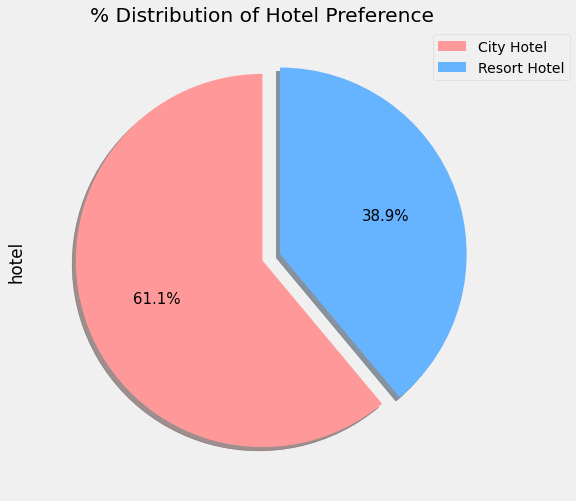

In [30]:
# Chart - 1 visualization code
colors = ['#ff9999','#66b3ff']
df['hotel'].value_counts().plot.pie(explode = [0,0.1],autopct='%1.1f%%',shadow=True, startangle=90,colors = colors,figsize=(12,8),fontsize=15,labels=None)
labels = df['hotel'].value_counts().index
plt.title('% Distribution of Hotel Preference')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart because the selected feature has only two unique values and also it gives percentage wise data distribution which is quite helpful for comparison purpose.

##### 2. What is/are the insight(s) found from the chart?

City hotel has the most number of bookings and it is the most preferred hotel by the visitors.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As far as City Hotel is concerned they have a good market share but for Resort Hotel they have to attract more number of guests in order to put  their market share comparable to City Hotel.

#### Chart - 2

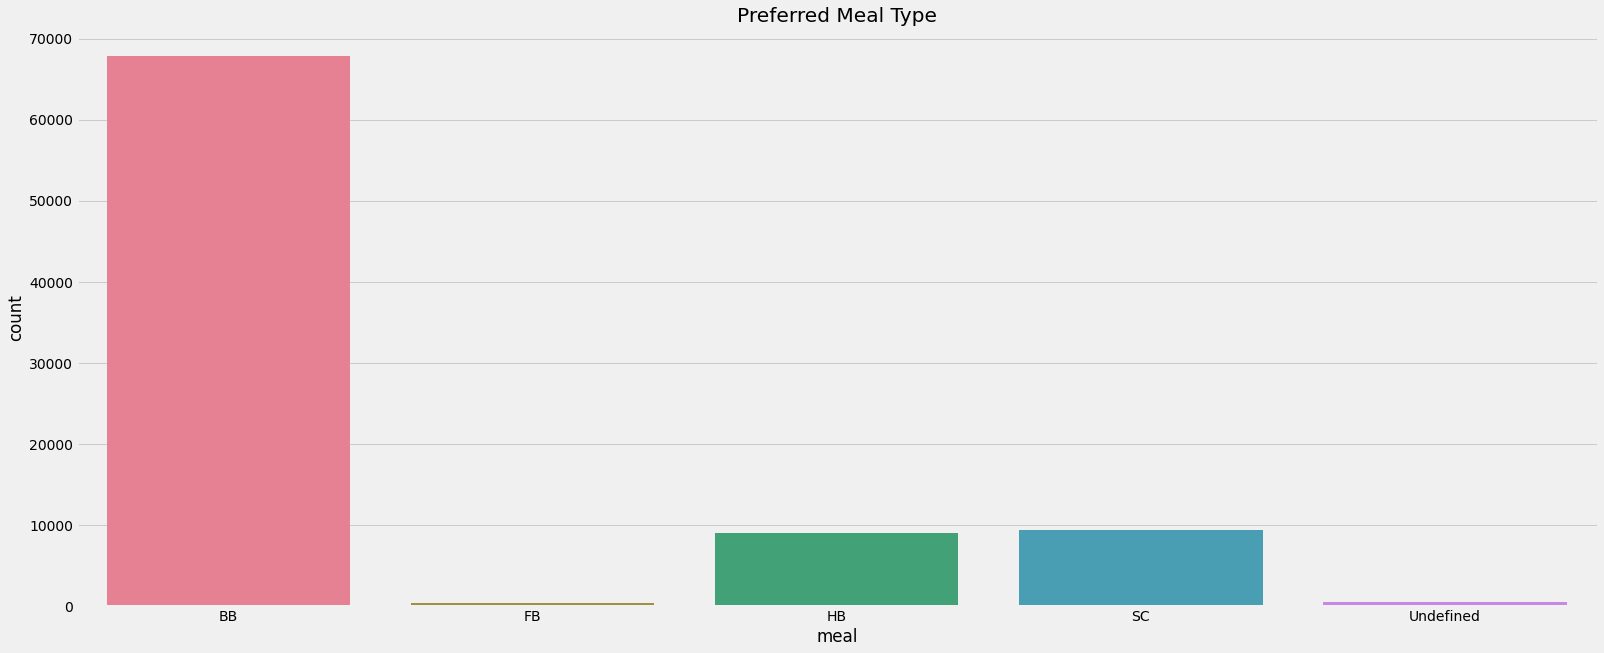

In [31]:
# Chart - 2 visualization code
sns.catplot(data = df,x = 'meal',kind = 'count',aspect = 2.5,height = 9,palette = 'husl')
plt.title("Preferred Meal Type")
plt.show()

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)



##### 1. Why did you pick the specific chart?

I have used countplot because it gives the frequency of the item present in a particular column which help us to analyze most frequent data.

##### 2. What is/are the insight(s) found from the chart?


#####The most preferred meal type by the guests is BB( Bed and Breakfast) 
#####HB- (Half Board) and SC- (Self Catering) are equally preferred.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#####BB(Bed and Breakfast) is preferred by most number of guests so Hotels must include this.

#### Chart - 3

In [32]:
df['country'].nunique()

177

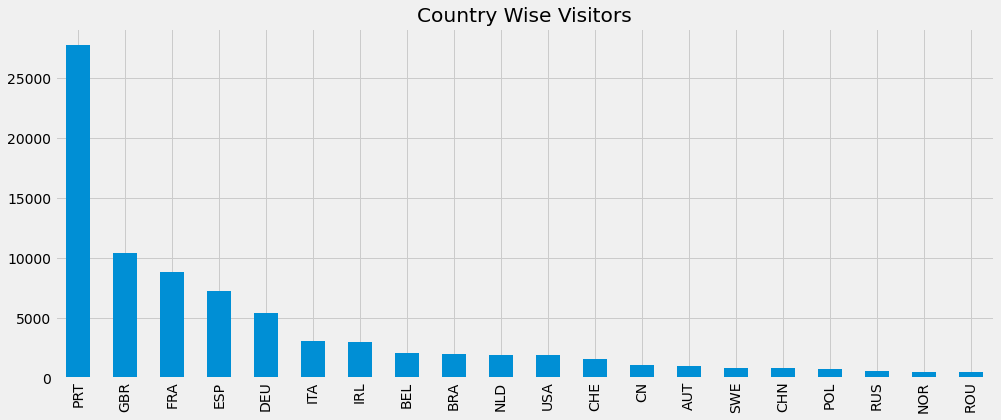

In [33]:
# Chart - 3 visualization code
# plotting top 20 where the most of the guest belongs
plt.figure(figsize = (15,6))
df['country'].value_counts()[:20].plot(kind = 'bar')
plt.title('Country Wise Visitors')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chat is useful to compare if the number of variables are more also we have categorical data on x-axis and numerical data on y-axis,so bar chart is most suited.

##### 2. What is/are the insight(s) found from the chart?

Most visitors are from Portugal(PRT) more than 25000 followed by United Kingdom(GBR) around 10000.

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

USA-United States

CHE-Switzerland

CN-China

AUT-Austria

SWE-Sweden

CHN-China

POL-Poland

RUS-Russia

NOR-Norway

ROU-Romania






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel industry must try to attract guest from the country which are at lower positions in the above chart.

#### Chart - 4

In [34]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [35]:
prefer_dist_channel = df['distribution_channel'].value_counts().reset_index().rename(columns = {'index':'distribution_channel','distribution_channel':'counts'})
#adding percentage columns to the distribution_channel_df.
prefer_dist_channel['count_percent'] = round(prefer_dist_channel['counts']*100/len(df),2)
prefer_dist_channel

,distribution_channel,counts,count_percent
0,TA/TO,69028,79.13
1,Direct,12954,14.85
2,Corporate,5062,5.80
3,GDS,181,0.21
4,Undefined,5,0.01


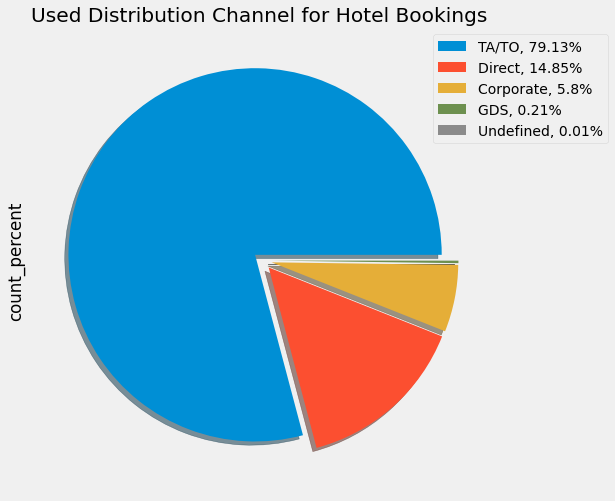

In [36]:
# Chart - 4 visualization code
# Creating labels
labels = prefer_dist_channel['distribution_channel'].values.tolist()
# Creating sizes
sizes = prefer_dist_channel['count_percent'].values.tolist()


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9900']


# creating pie chart
prefer_dist_channel['count_percent'].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=True, figsize=(15,8),fontsize=10,labels=None)

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]


plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.title('Used Distribution Channel for Hotel Bookings ')
plt.show()


##### 1. Why did you pick the specific chart?

To make comparison among categorical data in terms of percentage where number of category are less then pie chart is useful.

##### 2. What is/are the insight(s) found from the chart?

'TA/TO' is mostly used for booking hotels.

#### Chart - 5

In [37]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

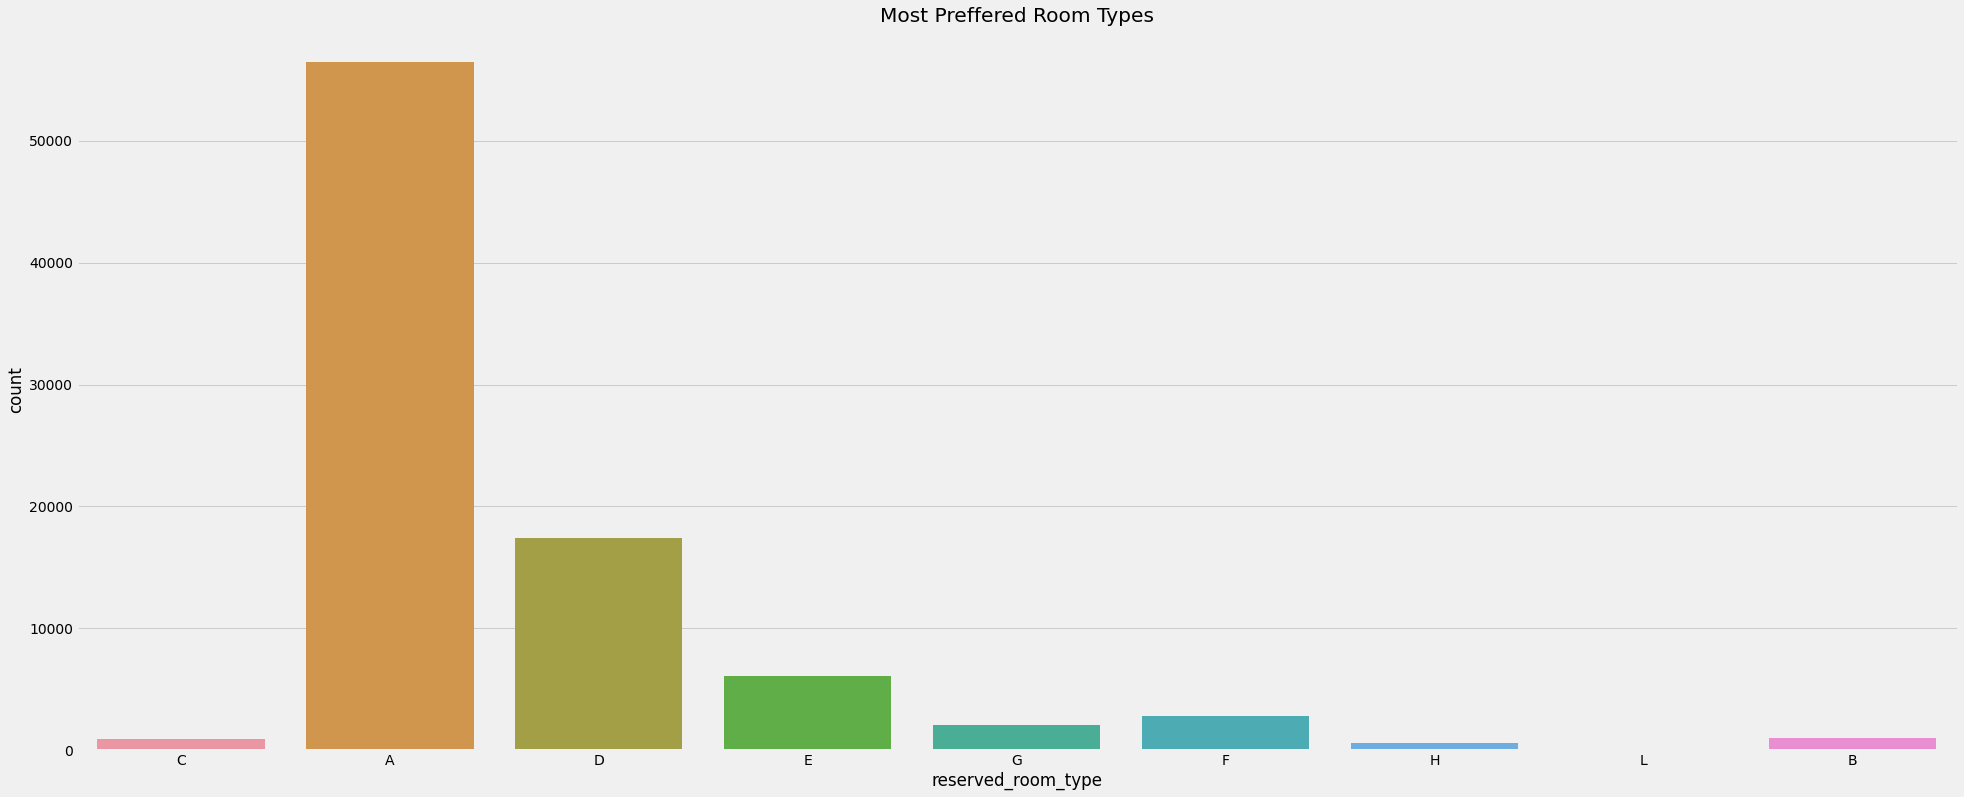

In [38]:
# Chart - 5 visualization code
sns.catplot(data = df,x = 'reserved_room_type',kind = 'count',height = 11,aspect = 2.5)
plt.title('Most Preffered Room Types')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Most Prefered Room type is "A"

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotels should have more number of rooms having type "A" because this room type is mostly preferred by guests. 

#### Chart - 6

In [39]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

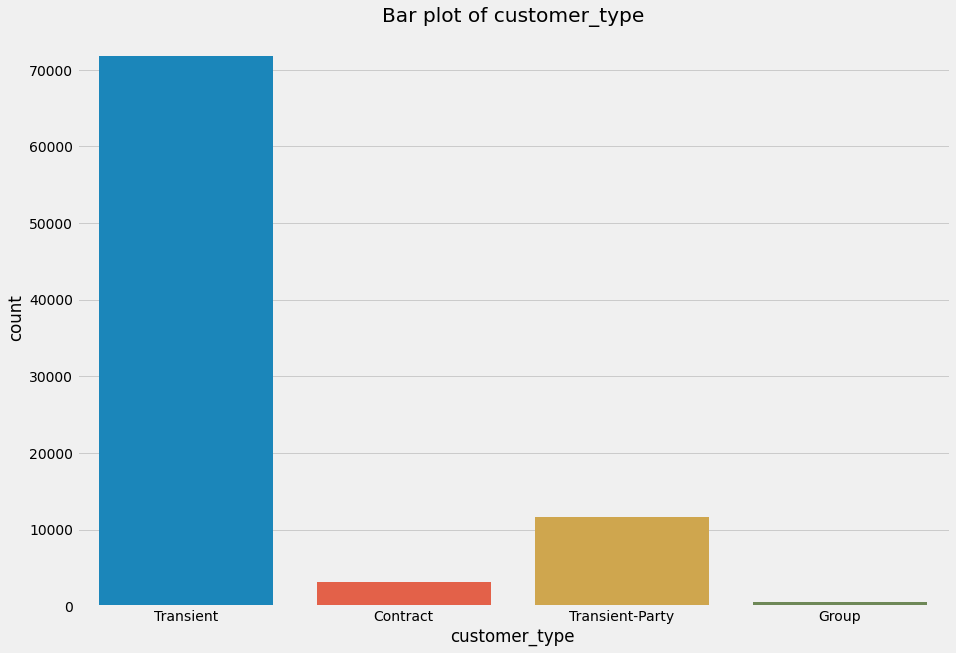

In [40]:
# Chart - 6 visualization code
sns.catplot(data = df,x = 'customer_type',kind = 'count',height = 9,aspect = 1.5)
plt.title('Bar plot of customer_type')
plt.show()

**1. Contract** 
>when the booking has an allotment or other type of contract associated to it

**2. Group**
> when the booking is associated to a group

**3. Transient**
>when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**
>when the booking is transient, but is associated to at least other transient booking



##### 2. What is/are the insight(s) found from the chart?

Transient Customer type is maximum While Group is minimum.

#### Chart - 7

In [41]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

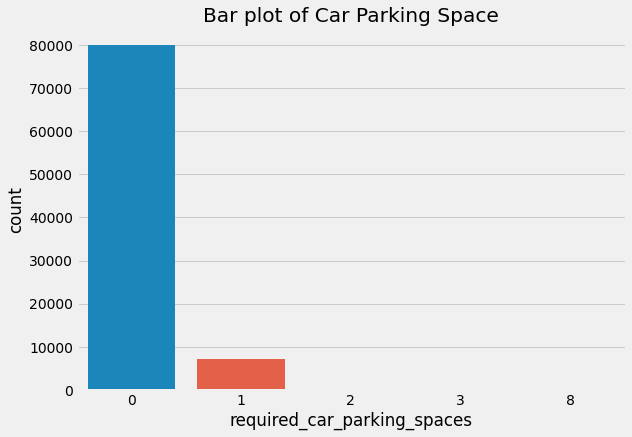

In [42]:
# Chart - 7 visualization code
sns.catplot(data = df,x = 'required_car_parking_spaces',kind = 'count',height = 6,aspect = 1.5)
plt.title('Bar plot of Car Parking Space')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Most guest does not need parking space at all only few guest asked for parking space of one car.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotels that does not have parking space more or less has no affect on their business.

#### Chart - 8

In [43]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11])

In [44]:
booking_change_df=df['booking_changes'].value_counts().reset_index().rename(columns = {'index':'number_booking_change','booking_changes':'counts'})
booking_change_df['counts_percent'] = booking_change_df['counts']*100/len(df)
booking_change_df

,number_booking_change,counts,counts_percent
0,0,71425,81.881234
1,1,10868,12.459016
2,2,3483,3.992892
3,3,862,0.988192
4,4,347,0.397799
5,5,113,0.129543
6,6,57,0.065344
7,7,29,0.033245
8,8,14,0.016050
9,9,8,0.009171


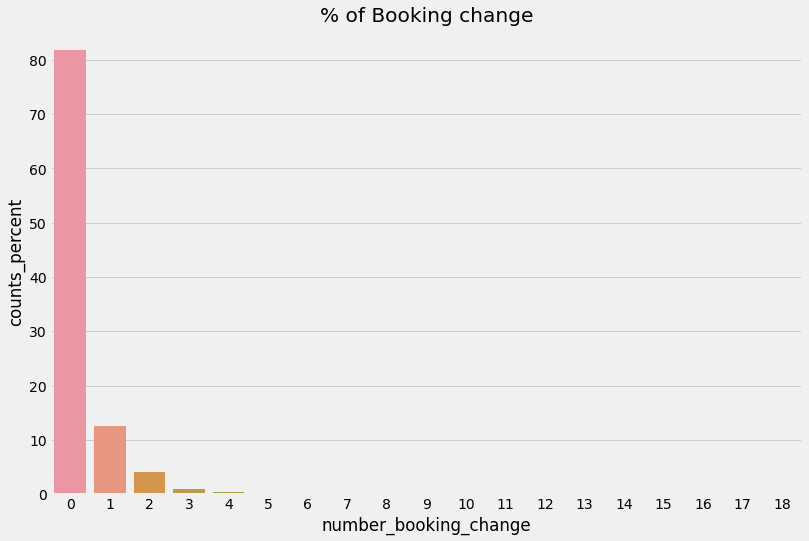

In [45]:
# Chart - 8 visualization code
plt.figure(figsize = (12,8))
sns.barplot(x = booking_change_df['number_booking_change'], y = booking_change_df['counts_percent'])
plt.title("% of Booking change")
plt.show()


### 0 Means no changes made in the booking
### 1 Means 1 changes made in the booking
### 2 Means 2 changes made in the booking & So on.

##### 2. What is/are the insight(s) found from the chart?


Most of the guests around 80% does't made any changes to the booking and around 12% of guest made one changes in their booking.

#BIVARIATE ANALYSIS

#### Chart - 9

In [46]:
# Creating a dataframe where the booking is canceled by the guests.
canceled_df = df[df['is_canceled']==1][['hotel','is_canceled']]
canceled_df.head()

,hotel,is_canceled
8,Resort Hotel,1
9,Resort Hotel,1
10,Resort Hotel,1
27,Resort Hotel,1
32,Resort Hotel,1


In [47]:
# Checking How many times the hotels were cancelled.
canceled_count = canceled_df.groupby('hotel')['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':'cancellation_count'})
canceled_count

,hotel,cancellation_count
0,City Hotel,16035
1,Resort Hotel,7974


In [48]:
# Checking How many times the respective hotel is booked.
total_booking = df.groupby('hotel')['hotel'].agg({'count'}).reset_index().rename(columns = {'count':'total_booking_counts'})
total_booking

,hotel,total_booking_counts
0,City Hotel,53274
1,Resort Hotel,33956


In [49]:
# Now concatenating the above two dataframes.
concatenated_df = pd.merge(canceled_count,total_booking)
concatenated_df

,hotel,cancellation_count,total_booking_counts
0,City Hotel,16035,53274
1,Resort Hotel,7974,33956


In [50]:
# Now adding percent_canceled feature in concatenated_df
concatenated_df['percent_canceled'] = (concatenated_df['cancellation_count']*100)/concatenated_df['total_booking_counts']
concatenated_df

,hotel,cancellation_count,total_booking_counts,percent_canceled
0,City Hotel,16035,53274,30.099110
1,Resort Hotel,7974,33956,23.483331


In [51]:
df.shape

(87230, 28)

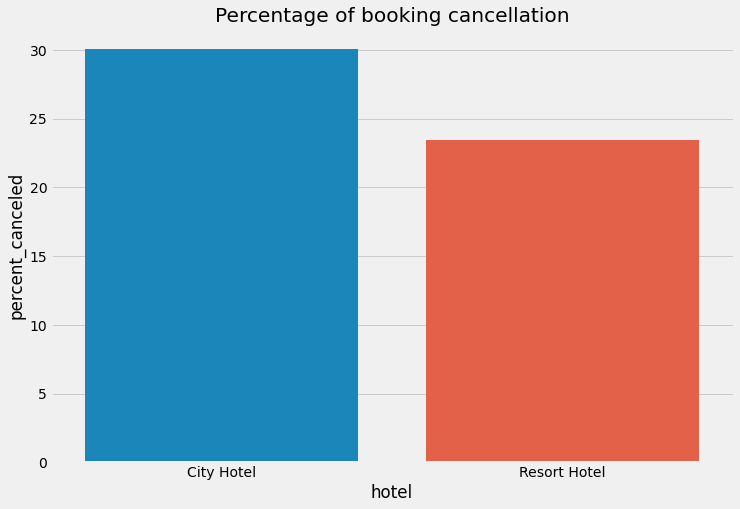

In [52]:
# Chart - 9 visualization code
sns.catplot(data = concatenated_df, x = 'hotel', y = 'percent_canceled', kind = 'bar' ,height = 7 , aspect = 1.5)
plt.title("Percentage of booking cancellation")
plt.show()

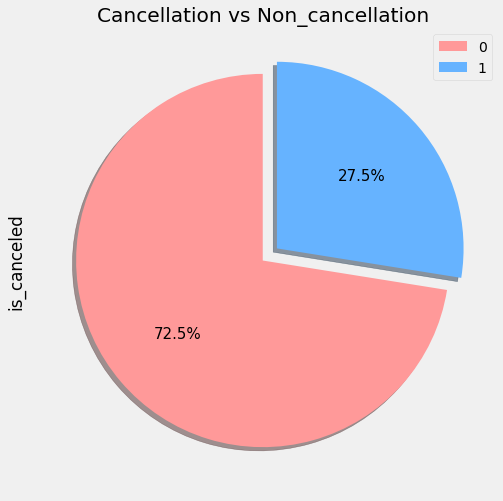

In [53]:
# Overall Cncellation vs Non cancellation
colors = ['#ff9999','#66b3ff']
df['is_canceled'].value_counts().plot.pie(explode = [0,0.1],autopct='%1.1f%%',shadow=True, startangle=90,colors = colors,figsize=(12,8),fontsize=15,labels=None)
labels = df['is_canceled'].value_counts().index
plt.title('Cancellation vs Non_cancellation')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

### 0 = Not Cancelled
### 1 = Cancelled

##### 2. What is/are the insight(s) found from the chart?

Total 27.5% of booking were cancelled out of which 30% of cancellation comes from City Hotel and 24% of cancellation comes from Resort Hotel.
So,City Hotel has higher rate of cancellation. 

#### Chart - 10

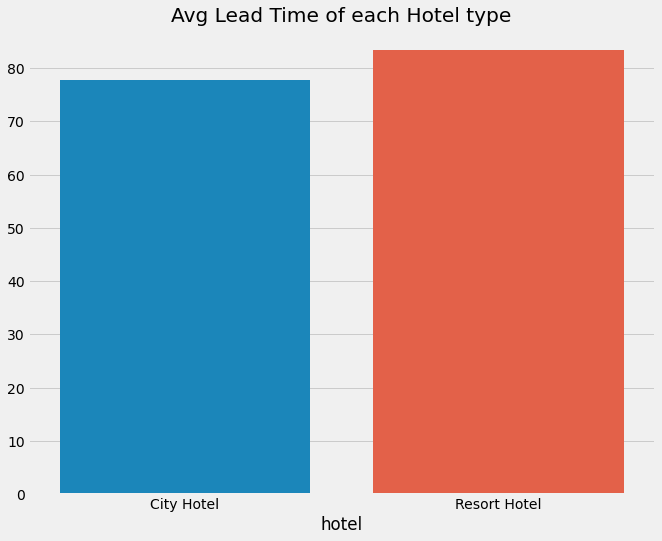

In [54]:
# Chart - 10 visualization code
plt.figure(figsize = (10,8))
sns.barplot(x = df.groupby('hotel')['lead_time'].mean().index,y = df.groupby('hotel')['lead_time'].mean().values)
plt.title("Avg Lead Time of each Hotel type")
plt.show()

###Booking or Reservation Lead Time is the period of time (most typically measured in calendar days) between when a guest makes the reservation and the actual check-in/arrival date.

##### 2. What is/are the insight(s) found from the chart?

Resort hotel has slightly higher lead time in comparison to City hotel.

#### Chart - 11

In [55]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

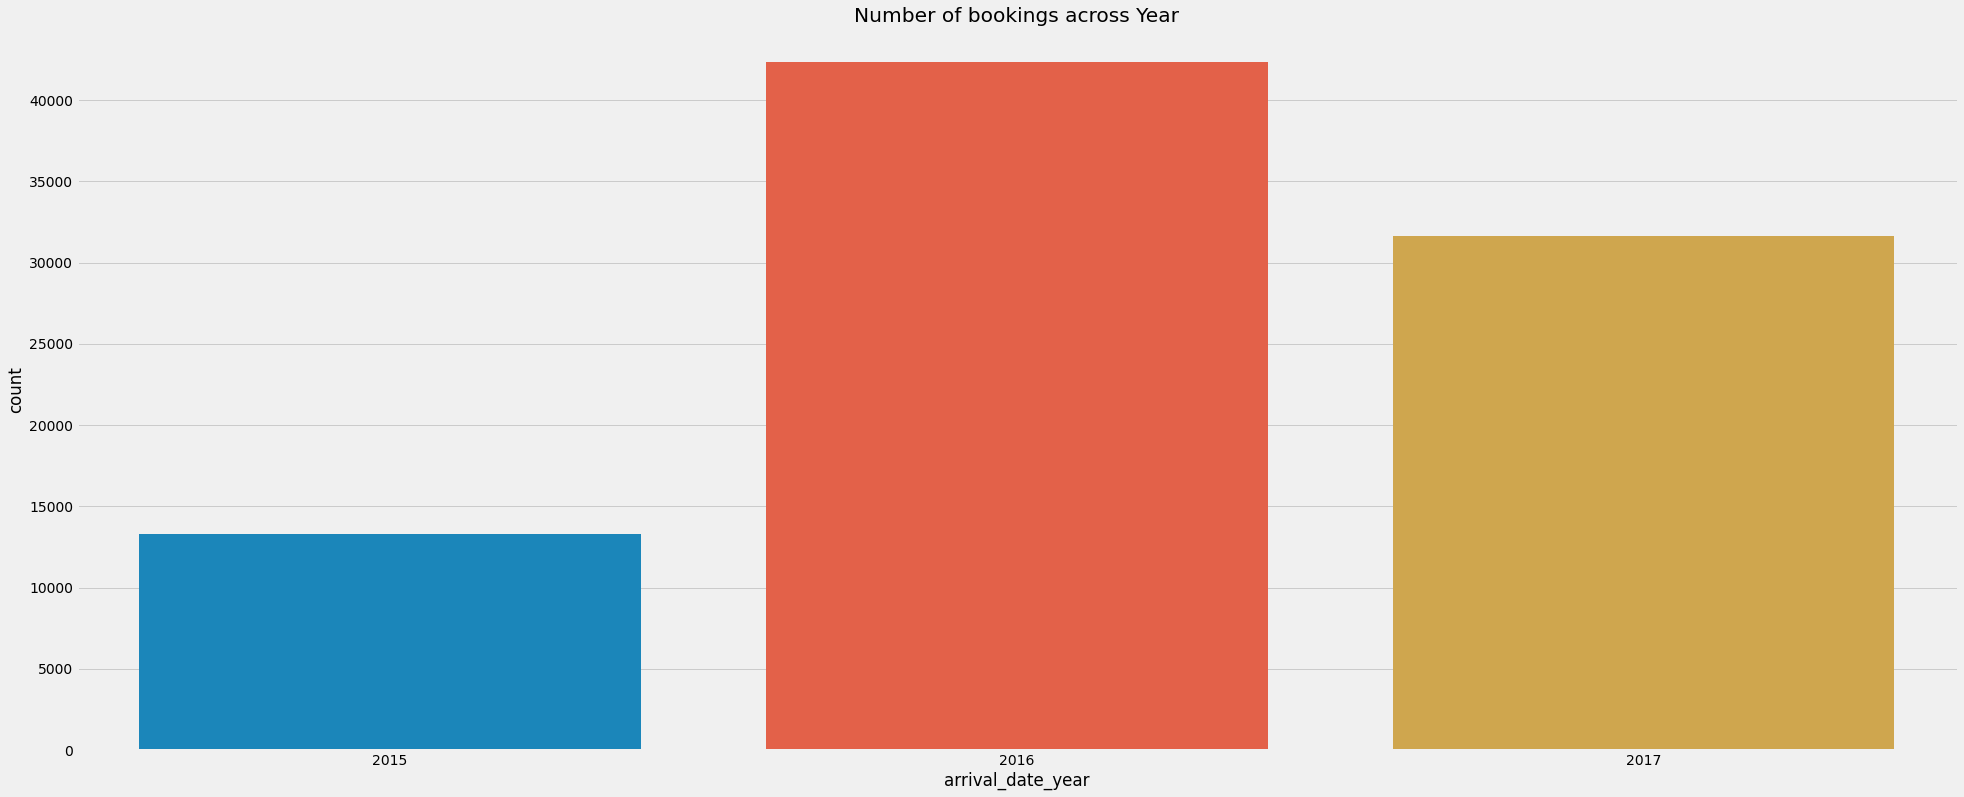

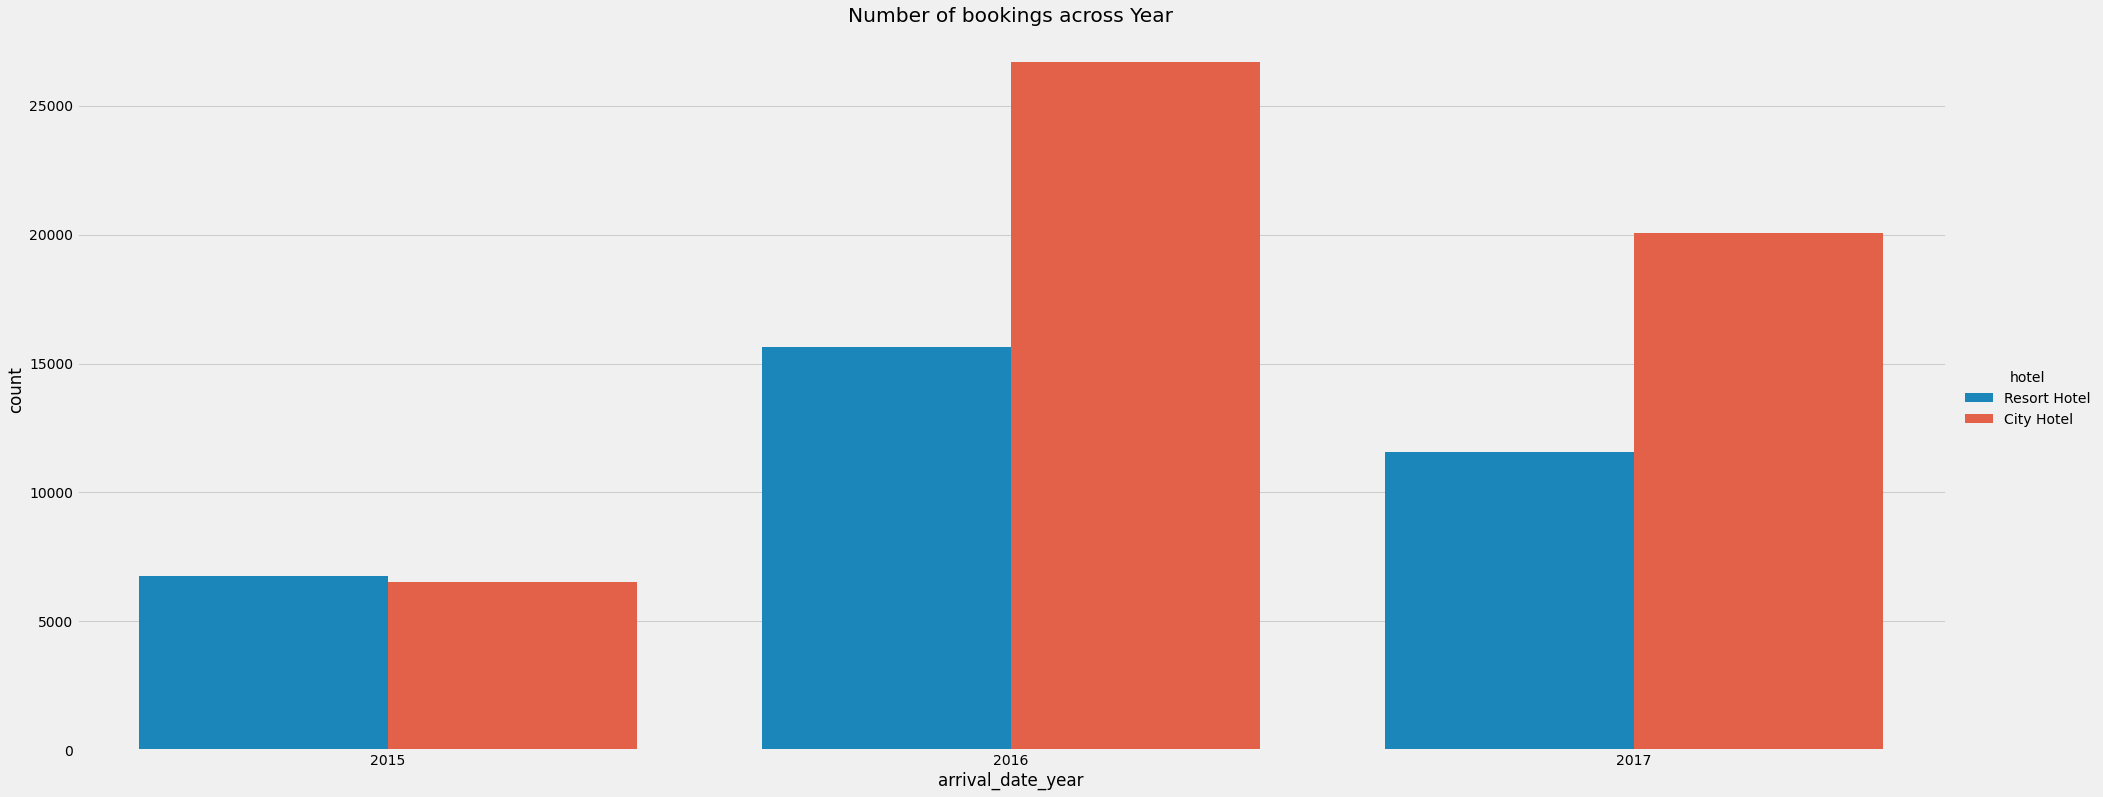

In [56]:
# Chart - 11 visualization code
sns.catplot(data = df,x = 'arrival_date_year',kind = 'count',height = 11,aspect = 2.5)
plt.title('Number of bookings across Year')
plt.show()


sns.catplot(data = df,x = 'arrival_date_year',kind = 'count',hue = 'hotel',height = 11,aspect = 2.5)
plt.title('Number of bookings across Year')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.2016 had been the best year for these hotels in terms of booking

2.Year 2015 City Hotel and Resort Hotel had excatly same number of bookings but after 2015 City Hotel has more number of bookings.

3.Year 2016 City Hotel had more than 250000 bookings while Resort Hotel has around 15000 bookings whereas in 2017 City Hotel had around 20000 bookings while Resort Hotel had around 12000 bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Resort Hotel which has around same number booking as City Hotel in 2015 but after 2015 Resort hotel had less booking in comparison with City Hotel although the Resort hotel had also Positive rate of change in terms of booking. 

#### Chart - 12

In [57]:
# Applying groupby on month & Hotels so that we can find total number of bookings in each month from each hotel
month_df = df.groupby(['arrival_date_month','hotel']).size().reset_index().rename(columns = {0:'Bookings'})

# Sorting order of month in accordance with calander
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_df['arrival_date_month'] = pd.Categorical(month_df['arrival_date_month'], categories=months, ordered=True)
month_df = month_df.sort_values(by = 'arrival_date_month')
month_df

,arrival_date_month,hotel,Bookings
8,January,City Hotel,2724
9,January,Resort Hotel,1961
6,February,City Hotel,3591
7,February,Resort Hotel,2492
15,March,Resort Hotel,2656
14,March,City Hotel,4833
0,April,City Hotel,5072
1,April,Resort Hotel,2828
17,May,Resort Hotel,2942
16,May,City Hotel,5402


In [58]:
# applying groupby on month 
month_wise_booking = month_df.groupby('arrival_date_month')['Bookings'].sum().reset_index()
month_wise_booking

,arrival_date_month,Bookings
0,January,4685
1,February,6083
2,March,7489
3,April,7900
4,May,8344
5,June,7756
6,July,10043
7,August,11242
8,September,6682
9,October,6921


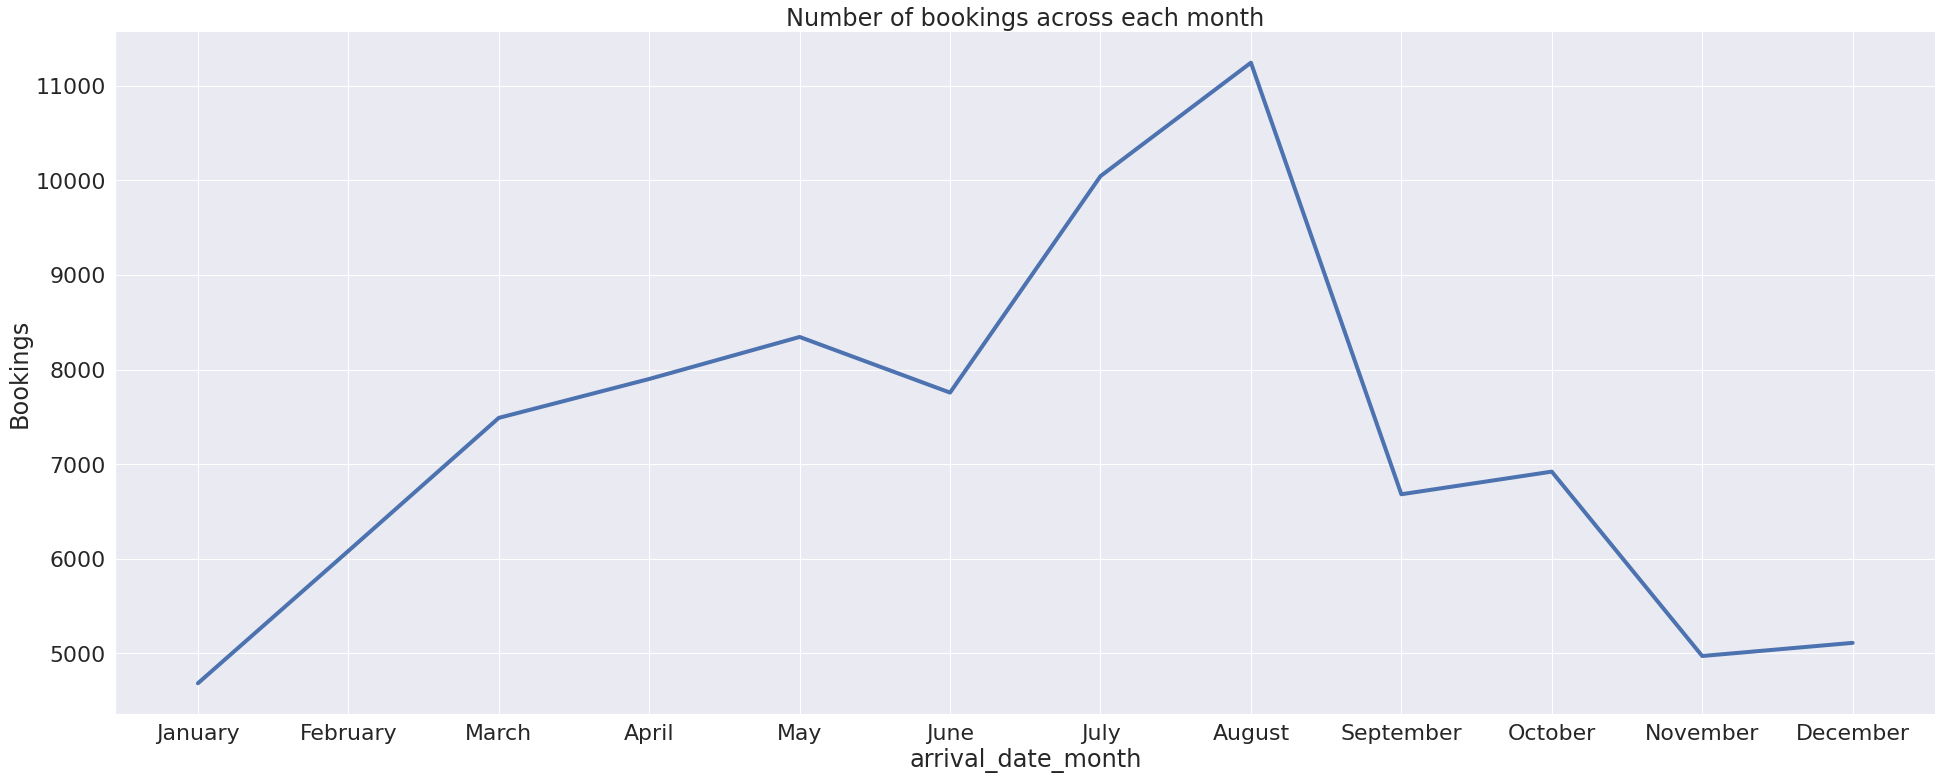

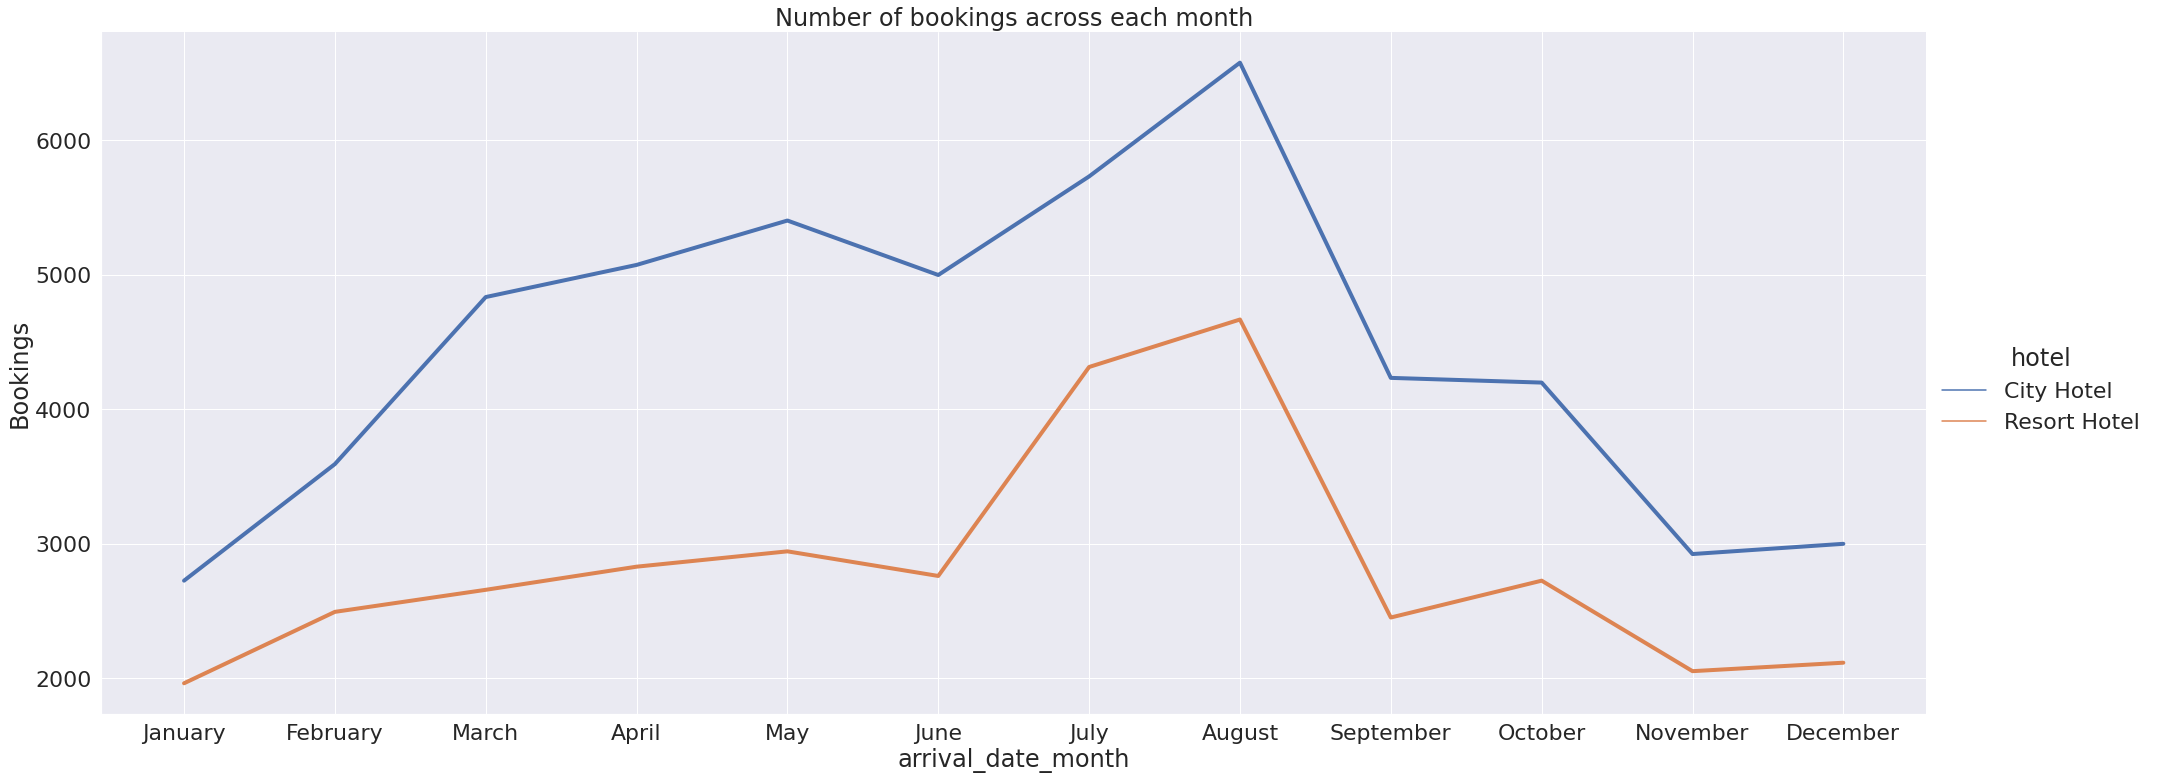

In [59]:
# Chart - 12 visualization code
sns.set(font_scale=2)
sns.relplot(data = month_wise_booking,x = 'arrival_date_month',y = 'Bookings',kind = 'line',height = 11,aspect = 2.5,lw = 4)  # lw = line_width
plt.title('Number of bookings across each month')
plt.show()

sns.relplot(data = month_df,x = 'arrival_date_month',y = 'Bookings',kind = 'line',hue = 'hotel',height = 11,aspect = 2.5,lw = 4) 
plt.title('Number of bookings across each month')
plt.show()

##### 1. Why did you pick the specific chart?

I picked line chart because line chart is best to find the trend available in the data.

##### 2. What is/are the insight(s) found from the chart?

1.July and August months had the most Bookings.

2.We can find similar trend in each month in each hotel.If City hotel has positive rate of change then resort hotel has also positive rate of change and if City hotel has negative rate of change then Resort Hotel has also negative rate of change although City Hotel has higher rate of change.

#### Chart - 13

In [60]:
# Creating a new DataFrame 
df_1 = df[['hotel','is_repeated_guest']]
df_1.head()

,hotel,is_repeated_guest
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0


0-New Guest

1-Repeated Guest

In [61]:
# applying groupby on hotel & taking sum which will give number of repeated guest.
repeat_guest_df = df_1.groupby('hotel').sum().reset_index().rename(columns = {'is_repeated_guest':'repeated guest_booking'})
repeat_guest_df


,hotel,repeated guest_booking
0,City Hotel,1657
1,Resort Hotel,1707


In [62]:
# fetching total number of boookings of each hotel
total_booking = df.groupby('hotel')['hotel'].agg({'count'}).reset_index().rename(columns = {'count':'total_booking_counts'})
total_booking

,hotel,total_booking_counts
0,City Hotel,53274
1,Resort Hotel,33956


In [63]:
# merging above two dataframe
merge_df = pd.merge(repeat_guest_df,total_booking,how = 'inner',on = 'hotel')
# adding a new column which will show percentage of repeated guest
merge_df['% repeated guest'] = merge_df['repeated guest_booking']*100/merge_df['total_booking_counts']
merge_df

,hotel,repeated guest_booking,total_booking_counts,% repeated guest
0,City Hotel,1657,53274,3.110335
1,Resort Hotel,1707,33956,5.027094


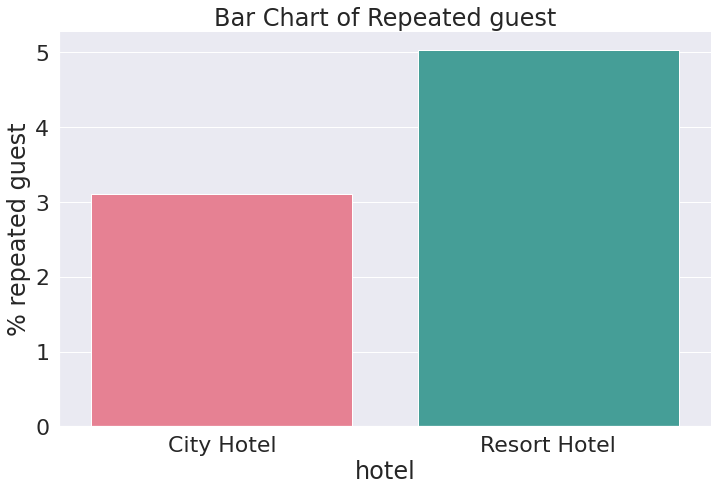

In [64]:
# Chart - 13 visualization code
sns.catplot(data = merge_df,x = 'hotel', y = '% repeated guest',kind = 'bar',aspect = 1.5,height = 7,palette = "husl")
plt.title('Bar Chart of Repeated guest')
plt.show()

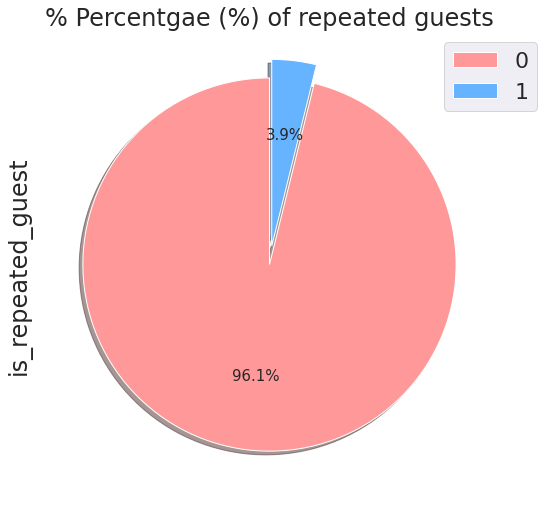

In [65]:
# Visualization of overall repeated guests
colors = ['#ff9999','#66b3ff']
df['is_repeated_guest'].value_counts().plot.pie(explode = [0,0.1],autopct='%1.1f%%',shadow=True, startangle=90,colors = colors,figsize=(12,8),fontsize=15,labels=None)
labels = df['is_repeated_guest'].value_counts().index
plt.title('% Percentgae (%) of repeated guests')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

0-New Guest

1-Repeated Guest

##### 2. What is/are the insight(s) found from the chart?

Both the hotel has lower retention rate i.e 3.9% in which City hotel has retention rate of 3.11% and Resort hotel has retentionn rate of 5.02%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Both the hotel will have to look why their retention rate is too low.They will have to make a strategy so that guest who visit hotel should have come again & again.

####Chart - 14

In [66]:
# Applying groupby on arrival_date_month & hotel and evaluating Mean on adr. 
bookings_by_months_df = df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

#create month list
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating order of the month acording to month list.
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'],categories = month,ordered= True)

# Now framing the dataframe according to the order of months
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


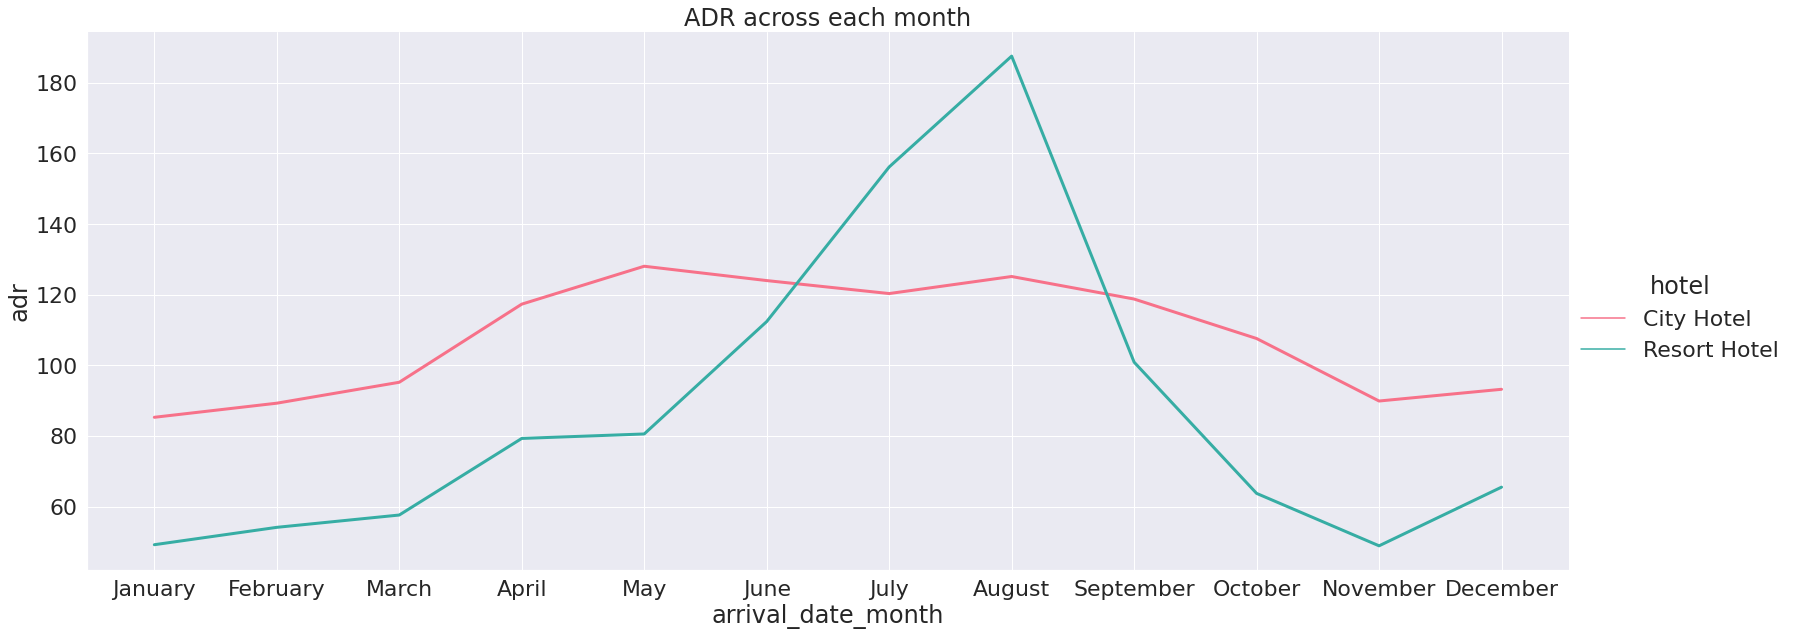

In [67]:
# Chart - 14 visualization code
sns.relplot(data = bookings_by_months_df,x = 'arrival_date_month' , y = 'adr',hue = 'hotel',kind = 'line',height = 9,aspect = 2.5,lw = 3,palette = "husl")
plt.title('ADR across each month')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

For Resort Hotel adr starts to increase from May and increases upto July after that is starts to decrease.

For City Hotel adr starts to increase fron March and increases upto April after that is starts to decrease.

Chart - 15

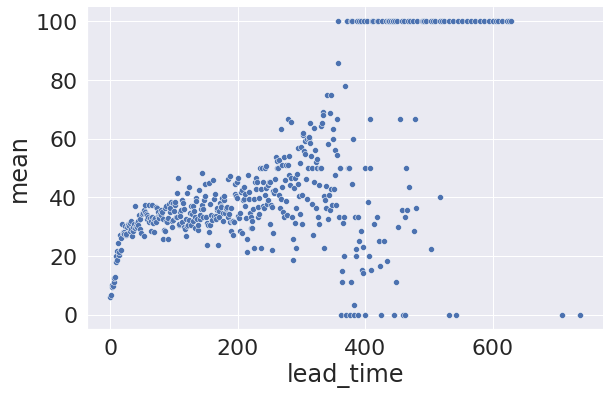

In [68]:
# Chart - 15 Visualisation Code
temp_df = df.groupby('lead_time')['is_canceled'].describe()
sns.relplot(data = temp_df,x = temp_df.index,y = temp_df['mean']*100,kind = 'scatter',aspect =1.5,height = 6)
plt.show()

##### 1. Why did you pick the specific chart?

Sctter Plot is used to find the relationship between two Numerical Variables.

##### 2. What is/are the insight(s) found from the chart?

Lead time has a positive correlation with the Cancellation mean as lead time increases the chances of booking get cancelled also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotels must try to decrease lead time to avoid booking cancellation from the guest.

Chart - 16

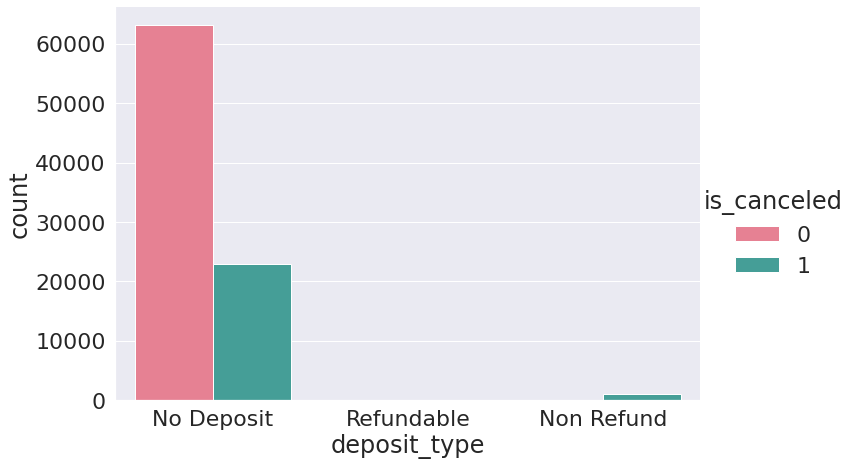

In [69]:
# Chart 16 Visualisation Code
sns.catplot(data = df,x = 'deposit_type',kind = 'count',hue = 'is_canceled',height = 7,aspect = 1.5,palette = "husl")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Around 25% of bookings were cancelled by guests with no deposit.So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation.

Chart - 17

In [70]:
# Applying groupby on distribution_channel & hotel and taking sum on 'is_canceled'
canceled_df = df.groupby(['distribution_channel'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':"total_canceled"})
canceled_df

,distribution_channel,total_canceled
0,Corporate,646
1,Direct,1923
2,GDS,36
3,TA/TO,21400
4,Undefined,4


In [71]:
# Applying groupby on distribution_channel so that we can find number of boooking made through each channel.
book_df = df.groupby('distribution_channel').size().reset_index().rename(columns = {0:'bookings'})
book_df

,distribution_channel,bookings
0,Corporate,5062
1,Direct,12954
2,GDS,181
3,TA/TO,69028
4,Undefined,5


In [72]:
# Merging above two dataframe
merged_df = pd.merge(canceled_df,book_df,how = 'inner',on = 'distribution_channel')
# Adding a column % cancellation
merged_df['% cancellation'] = merged_df['total_canceled']*100/merged_df['bookings']
merged_df

,distribution_channel,total_canceled,bookings,% cancellation
0,Corporate,646,5062,12.761754
1,Direct,1923,12954,14.844836
2,GDS,36,181,19.889503
3,TA/TO,21400,69028,31.001912
4,Undefined,4,5,80.000000


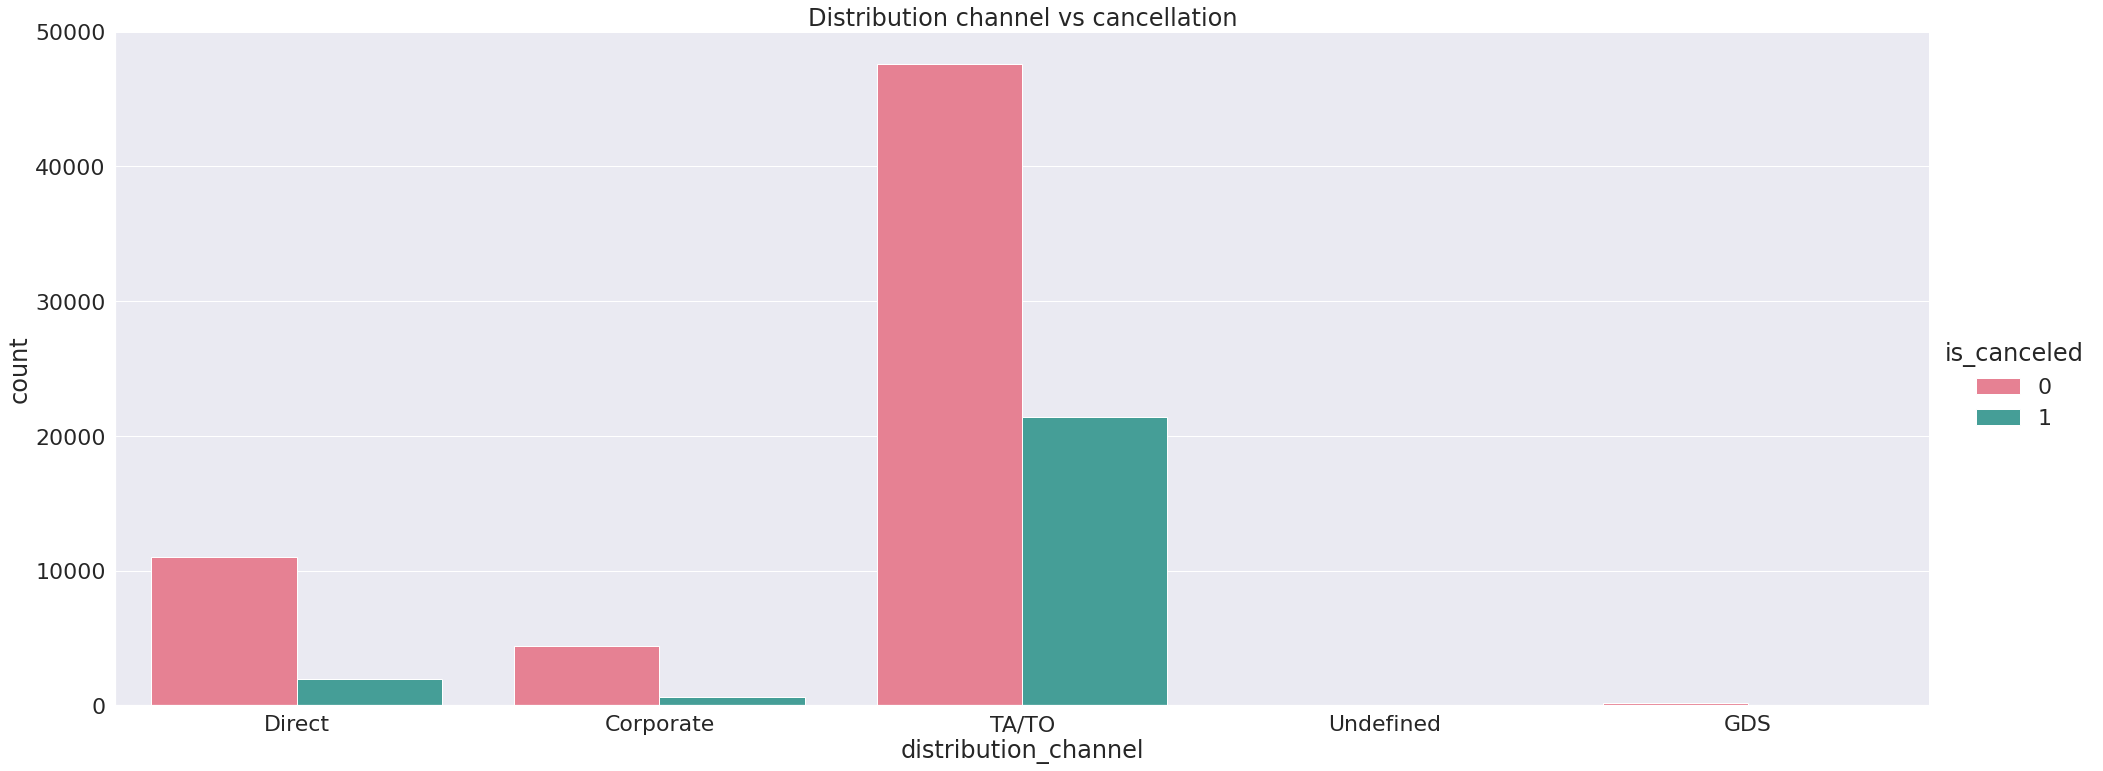

In [73]:
# Chart 17 Visualisation Code
sns.catplot(data = df,x = 'distribution_channel',kind = 'count',hue = 'is_canceled',height = 11,aspect = 2.5,palette = "husl")
plt.title('Distribution channel vs cancellation')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Total 69028 bookings were made by TA/TO in which 21400 were cancelled which is approximately 31%.

Chart-18

In [74]:
# Applying groupby on market_segment & hotel and taking sum on 'is_canceled'.
canceled_df_ = df.groupby(['market_segment'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':"total_canceled"})
canceled_df_

,market_segment,total_canceled
0,Aviation,45
1,Complementary,85
2,Corporate,509
3,Direct,1737
4,Groups,1332
5,Offline TA/TO,2057
6,Online TA,18242
7,Undefined,2


In [75]:
# Applying groupby on market_segment so that we can find number of boooking made through each channel.
book_df_ = df.groupby('market_segment').size().reset_index().rename(columns = {0:'bookings'})
book_df_

,market_segment,bookings
0,Aviation,226
1,Complementary,692
2,Corporate,4200
3,Direct,11780
4,Groups,4922
5,Offline TA/TO,13855
6,Online TA,51553
7,Undefined,2


In [76]:
# Merging above two dataframe
merged_df_ = pd.merge(canceled_df_,book_df_,how = 'inner',on = 'market_segment')
# Adding a column % cancellation
merged_df_['% cancellation'] = merged_df_['total_canceled']*100/merged_df_['bookings']
merged_df_

,market_segment,total_canceled,bookings,% cancellation
0,Aviation,45,226,19.911504
1,Complementary,85,692,12.283237
2,Corporate,509,4200,12.119048
3,Direct,1737,11780,14.745331
4,Groups,1332,4922,27.062170
5,Offline TA/TO,2057,13855,14.846626
6,Online TA,18242,51553,35.384944
7,Undefined,2,2,100.000000


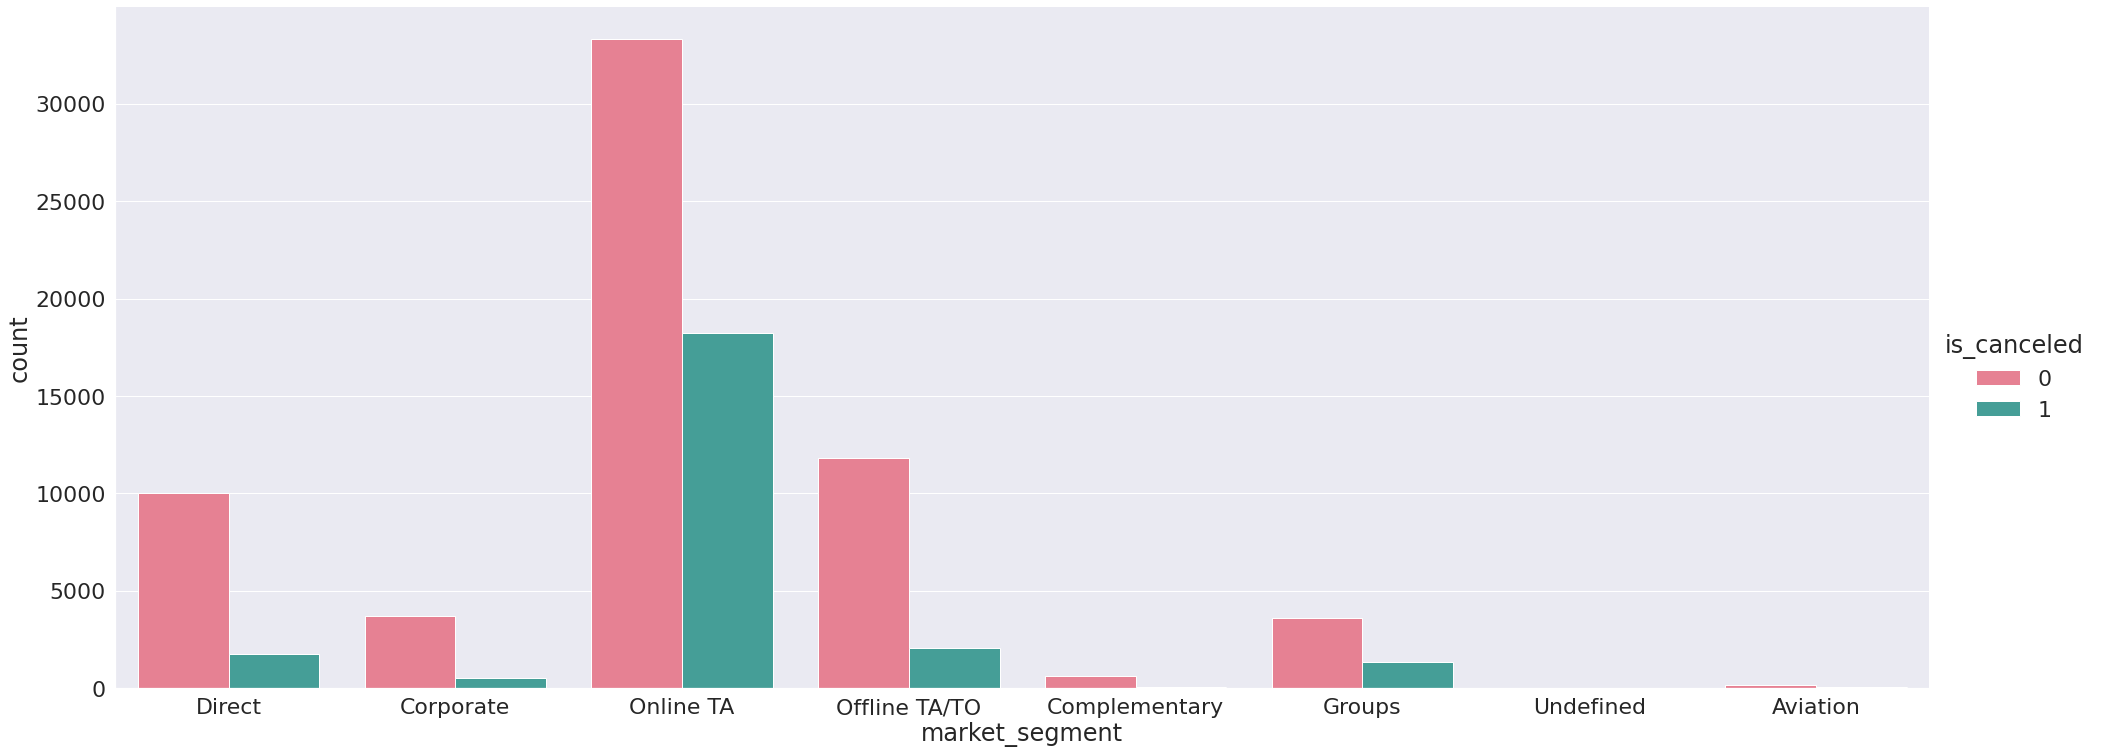

In [77]:
# Chart 18 Visualisation Code
sns.catplot(data = df,x = 'market_segment',kind = 'count',hue = 'is_canceled',height = 11,aspect = 2.5,palette = "husl")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Online TA has around 35% cancellation rate followed by Groups which has around 27% Cancellation rate.

Chart - 19

DISTRIBUTION CHANNEL CONTRIBUTION IN ADR

In [78]:
# Applying groupby on distribution_channel and evaluating Mean on adr.
dist_chan_df = df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index().rename(columns = {'adr':'mean_adr'})
dist_chan_df

,distribution_channel,hotel,mean_adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


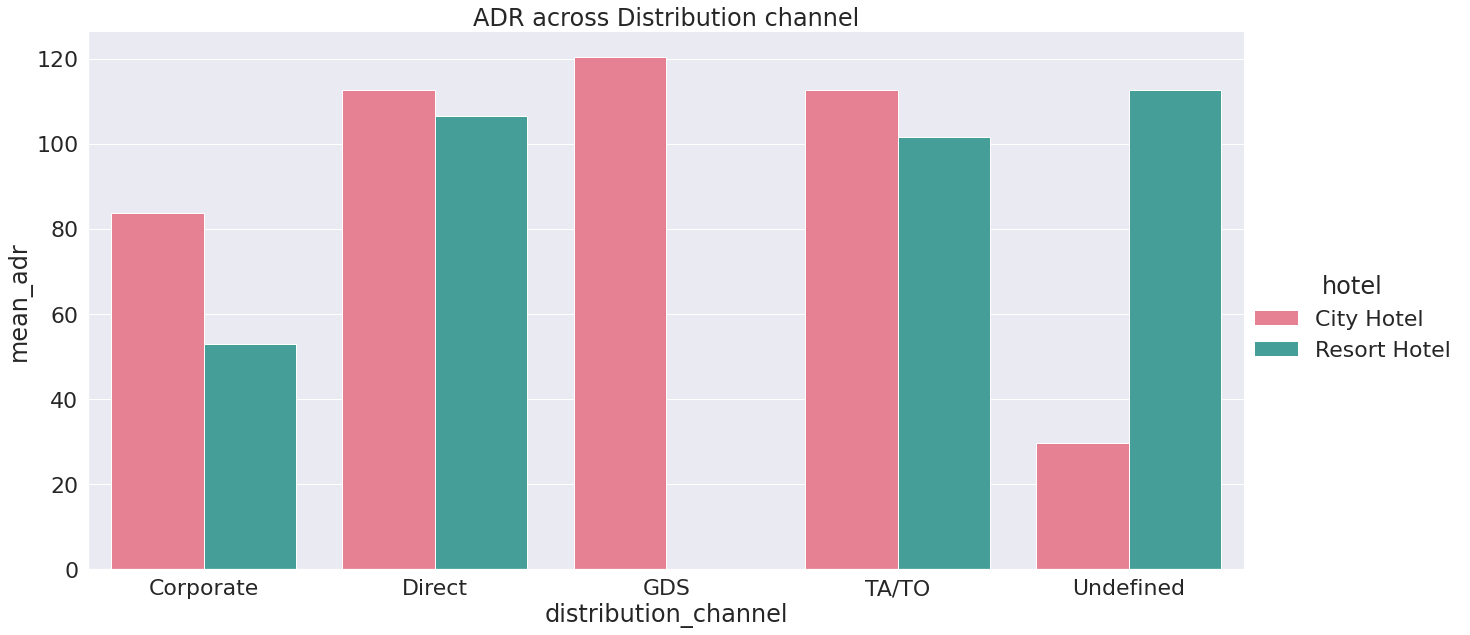

In [79]:
#Chart 19 Visualisation Code
sns.catplot(data = dist_chan_df, x = 'distribution_channel', y = 'mean_adr',kind = 'bar',hue = 'hotel',palette = "husl",height = 9,aspect = 2)
plt.title('ADR across Distribution channel')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

It is clear from the plot that Distribution Channnel "Direct" & "TA/TO" has contributed more in ADR in both the hotels.

Distribution Channel "GDS" has contributed in "City Hotel" only.

"Resort Hotel" has great ADR from some undefined channel.

Chart - 20

ALLOCATED ROOM TYPE VS ASSINGNED ROOM TYPE

In [80]:
# creating new dataframe with required features
df_new = df[['reserved_room_type','assigned_room_type']]
df_new.head(10)

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
6,C,C
7,C,C
8,A,A
9,D,D
10,E,E


In [81]:
# making a function to add new features as flag
def room_similarity(data):
  if data['reserved_room_type'] == data['assigned_room_type']:
    return 1
  else:
    return 0

In [82]:
# apply the function
df_new['flag'] = df_new.apply(lambda data :room_similarity(data),axis = 1)

In [83]:
df_new.head(10)

,reserved_room_type,assigned_room_type,flag
0,C,C,1
1,C,C,1
2,A,C,0
3,A,A,1
4,A,A,1
6,C,C,1
7,C,C,1
8,A,A,1
9,D,D,1
10,E,E,1


In [84]:
# Now Calculating how many people getting their choice of roooms
# count of 1 calculates how many people geting their choice of rooms
# count of 0 calculated how many people not geting their chice of rooms
room_choice_df = df_new.groupby('flag').agg({'flag':'count'}).rename(columns = {'flag':'counts'}).reset_index()
room_choice_df

,flag,counts
0,0,12990
1,1,74240


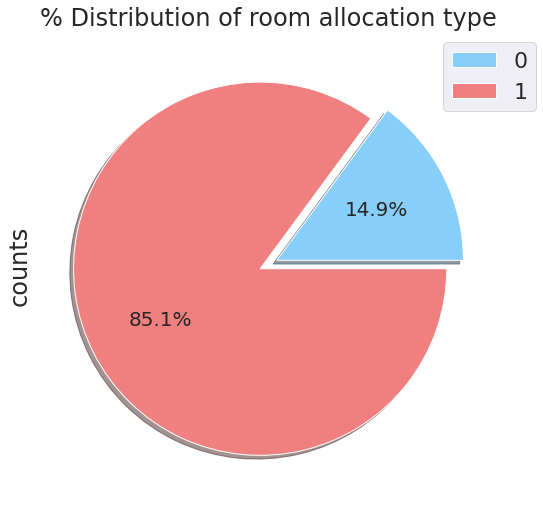

In [85]:
# Chart 20 Visualization code
colors = ['lightskyblue','lightcoral']
room_choice_df['counts'].plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(14,8),fontsize=20,labels=None,colors = colors)
plt.title("% Distribution of room allocation type")
labels=room_choice_df['flag'].values.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

1 indicates assinged room type is same as assinged room type

0 indicates assinged room type and reserved room types are different

##### 2. What is/are the insight(s) found from the chart?

Majority of people are getting room of their choices.

Chart - 21

NOT GETTING ROOM TYPE OF CHOICES VS CANCELLATION

In [86]:
# Checking first 5 rows of df_new
df_new.head(5)

,reserved_room_type,assigned_room_type,flag
0,C,C,1
1,C,C,1
2,A,C,0
3,A,A,1
4,A,A,1


In [87]:
# Creating a temp dataframe from df only by considering 'hotel' & 'is_canceled' features
temp_df = df[['hotel','is_canceled']]
temp_df.head()

,hotel,is_canceled
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0


In [88]:
# Now concatenating the above two dataframes 
df_new = pd.concat([df_new,temp_df],axis = 1)

In [89]:
df_new.head()

,reserved_room_type,assigned_room_type,flag,hotel,is_canceled
0,C,C,1,Resort Hotel,0
1,C,C,1,Resort Hotel,0
2,A,C,0,Resort Hotel,0
3,A,A,1,Resort Hotel,0
4,A,A,1,Resort Hotel,0


In [90]:
df_new.shape

(87230, 5)

In [91]:
# Applying groupby operation on flag and evaluating Sum on 'is_canceled' features.This will give total number of cancelled booking w.r.t room allocation.
# flag 0 ----Represents customers does't get room of their choices
# flag 1 ----Represents customers does get room of their choices

room_alloc_can_df = df_new.groupby(['flag','hotel'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':'total_cancellation'})

# Checking number of rows in room_alloc_can_df where flag is zero(0)
flag_0_shape = df_new.loc[df_new['flag'] == 0].shape[0]
print(f'number of rows with flag 0 are {flag_0_shape}')

# Checking number of rows in room_alloc_can_df where flag is zero(1)
flag_1_shape = df_new.loc[df_new['flag'] == 1].shape[0]
print(f'number of rows with flag 1 are {flag_1_shape}')

print(' ')

# Adding a new feature 'cancel_percent' which represents (total_cancellation with flag 0)*100 / total number of booking with flag 0 
#                                                       &(total_cancellation with flag 1)*100 / total number of booking with flag 1
room_alloc_can_df['cancel_percent'] = np.where(room_alloc_can_df['flag'] == 0,(room_alloc_can_df['total_cancellation']*100)/flag_0_shape,room_alloc_can_df['total_cancellation']*100/flag_1_shape)
room_alloc_can_df

number of rows with flag 0 are 12990
number of rows with flag 1 are 74240
 


,flag,hotel,total_cancellation,cancel_percent
0,0,City Hotel,314,2.417244
1,0,Resort Hotel,302,2.324865
2,1,City Hotel,15721,21.175916
3,1,Resort Hotel,7672,10.334052


flag 0 ----Represents customers does't get room of their choices

flag 1 ----Represents customers does get room of their choices

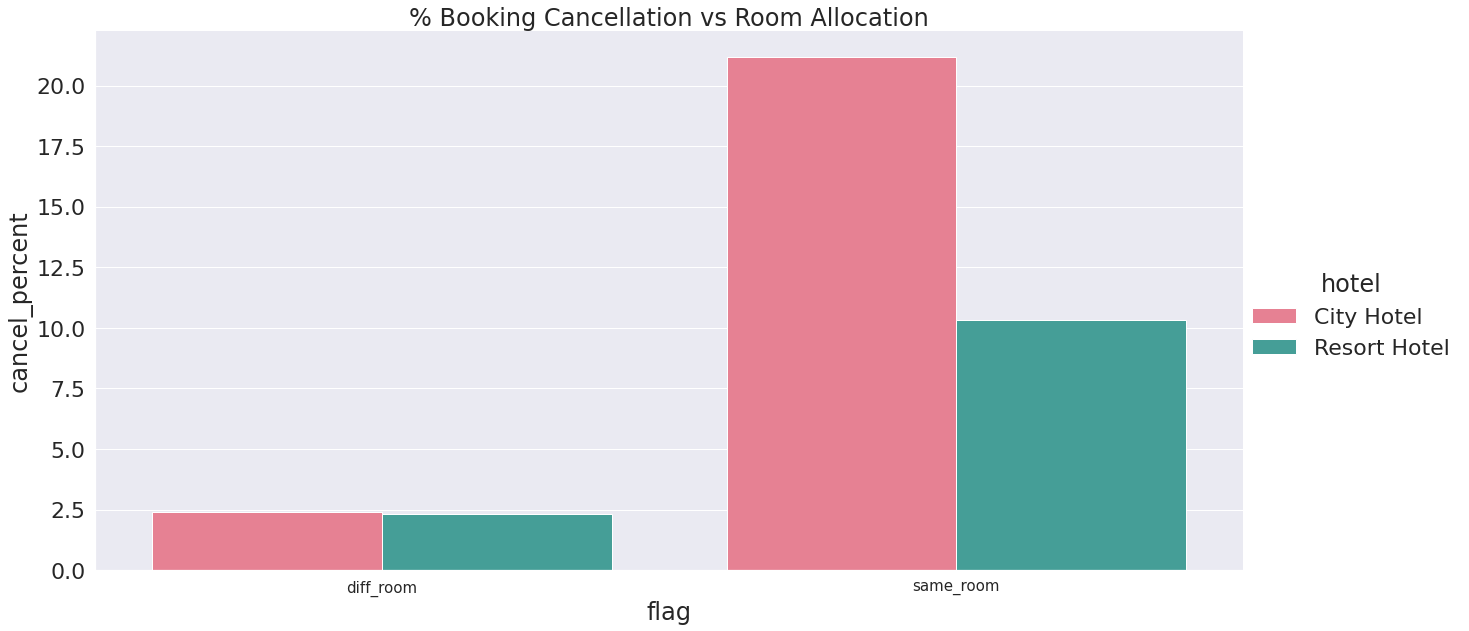

In [92]:
# Chart 21 Visualization code
sns.catplot(data = room_alloc_can_df,x = 'flag' , y = 'cancel_percent',hue = 'hotel' , kind = 'bar',palette = "husl",height = 9,aspect = 2)
plt.title('% Booking Cancellation vs Room Allocation')
plt.xticks([0,1],['diff_room','same_room'],fontsize=15)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

It is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

Chart - 22

MARKET SEGMENT VS ADR

In [93]:
# Applying groupby on hotel & market segment and evaluating mean on adr
mkt_seg_df = df.groupby(['market_segment','hotel'])['adr'].mean().reset_index().rename(columns = {'adr':'mean_adr'})
mkt_seg_df  

,market_segment,hotel,mean_adr
0,Aviation,City Hotel,100.613628
1,Complementary,City Hotel,2.802048
2,Complementary,Resort Hotel,3.868466
3,Corporate,City Hotel,83.020234
4,Corporate,Resort Hotel,51.920873
5,Direct,City Hotel,121.243682
6,Direct,Resort Hotel,112.827406
7,Groups,City Hotel,85.262047
8,Groups,Resort Hotel,63.688498
9,Offline TA/TO,City Hotel,87.632267


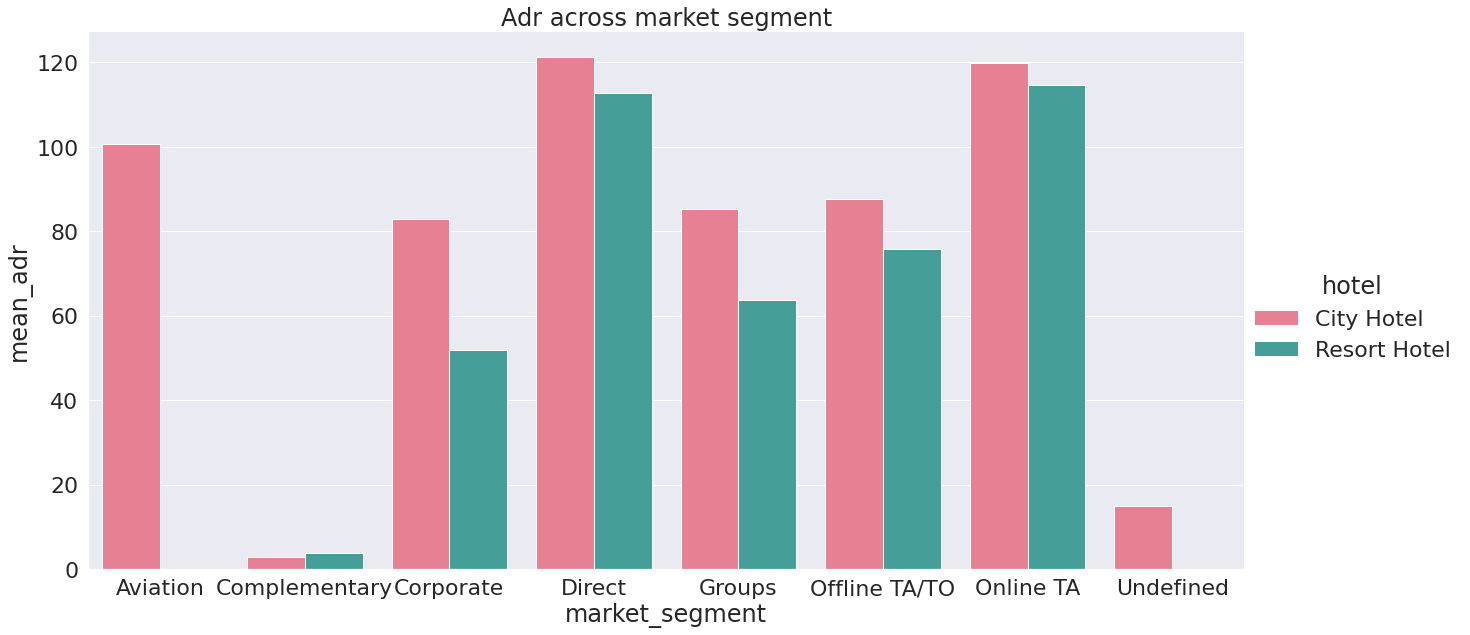

In [94]:
# Chart 22 Visualisation Code
sns.catplot(data = mkt_seg_df,x = 'market_segment',y = 'mean_adr',hue = 'hotel',kind = 'bar',palette = "husl",height = 9,aspect = 2)
plt.title('Adr across market segment')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

'Direct' and 'Online TA' are contributing the most in both types of hotels.

Aviation segment should focus on increasing the bookings of 'City Hotel'.

Chart - 23

In [108]:
# Applying groupby on total_stay & hotel and taking counts
stay_df = df.groupby(['total_stay','hotel']).agg({'total_stay':'count'}).rename(columns = {'total_stay':'count_of_stay'}).reset_index()
stay_df.head()

,total_stay,hotel,count_of_stay
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813


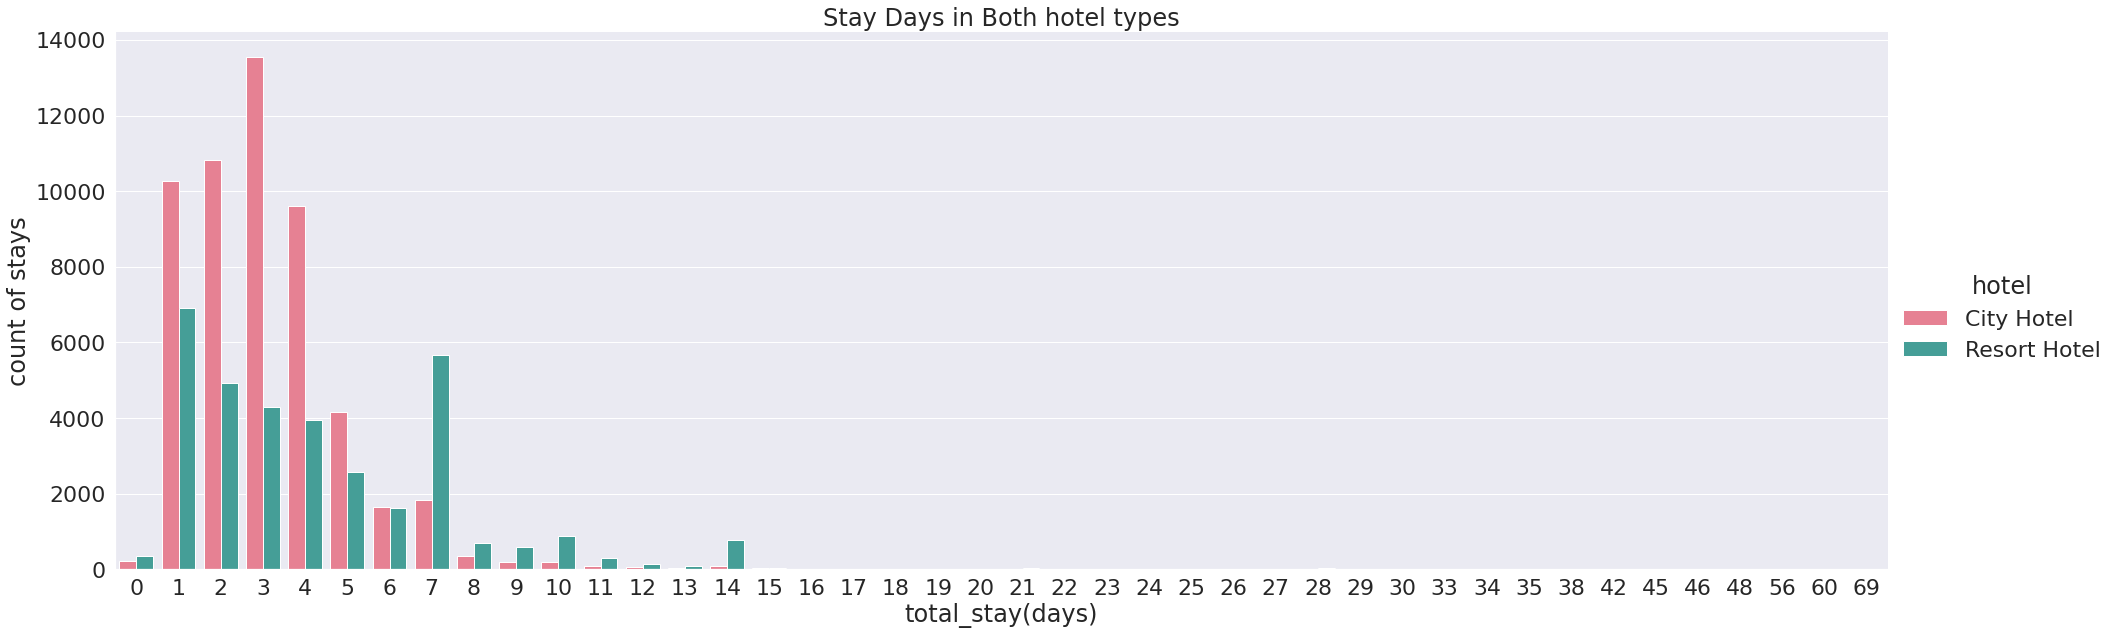

In [114]:
# Chart 23 Visualisation Code
sns.catplot(data = stay_df,x = 'total_stay',y = 'count_of_stay',hue = 'hotel',kind = 'bar',palette = "husl",height = 9,aspect = 3)
plt.title('Stay Days in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Most of the People stays in these hotels are within 7 days and people staying 1 to 3 days are more in number.

#### Chart - 24 - Correlation Heatmap

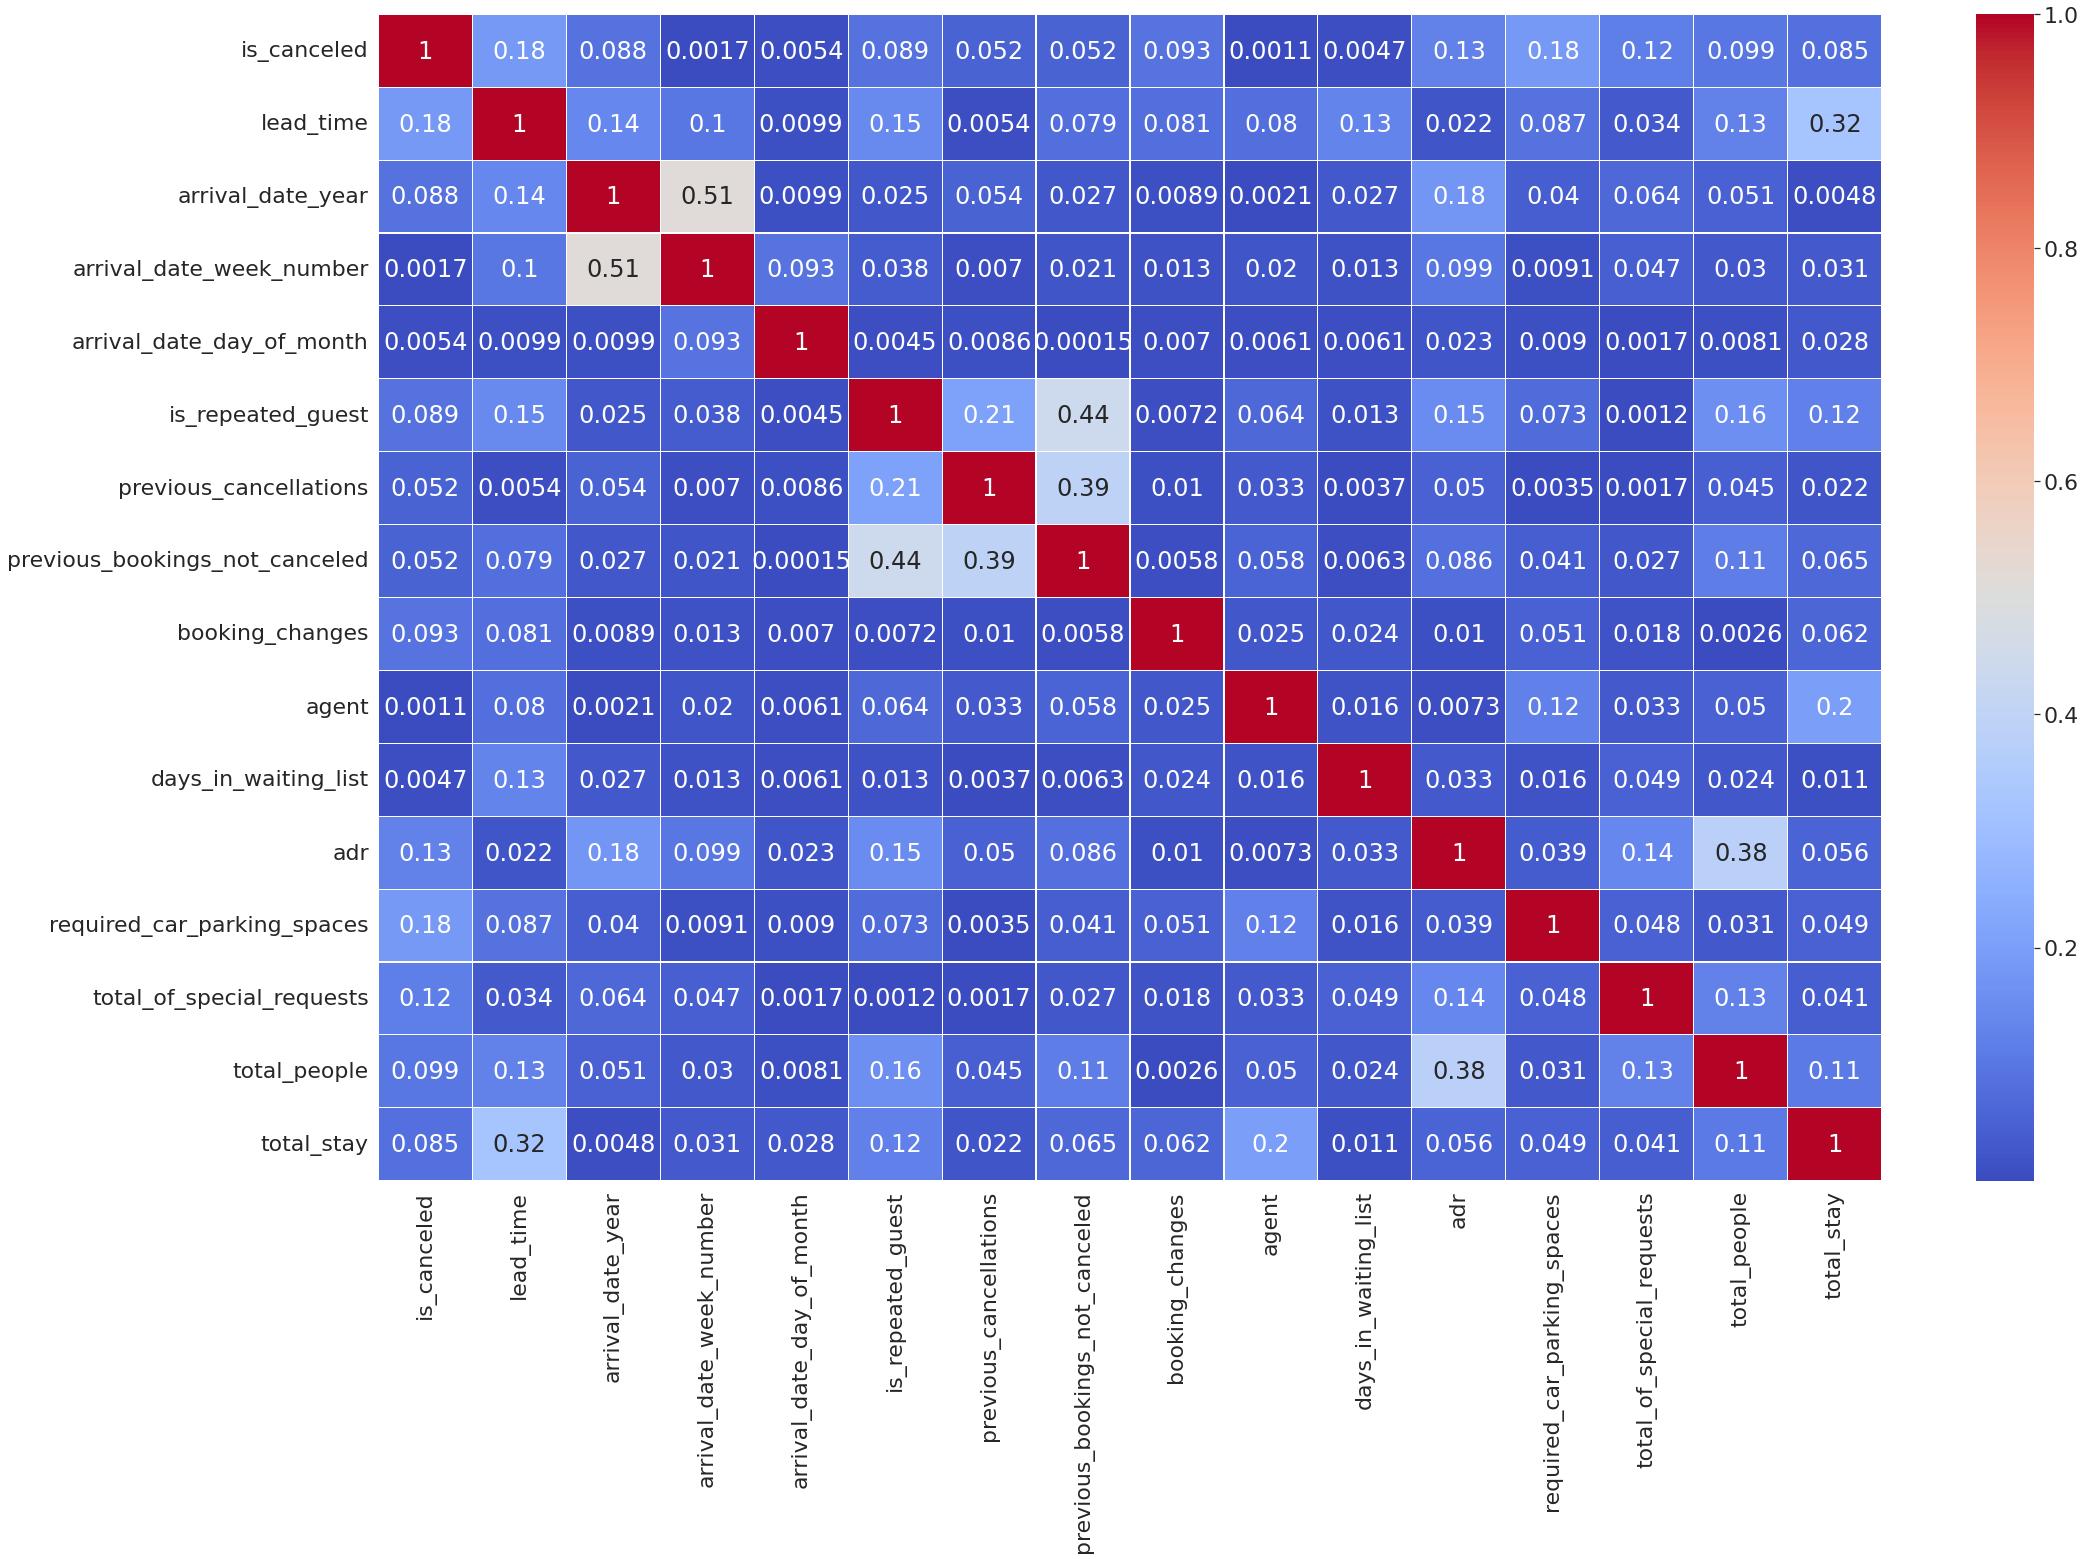

In [95]:
# Correlation Heatmap visualization code
data_corr= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(abs(data_corr), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation Heatmap gives strength of linear relationship between each variables.

##### 2. What is/are the insight(s) found from the chart?

1)Total stay and lead time is positively correlated which impliees if total stay increases then lead time also increases which is quite obvious.

2)Repeated guest and previous booking not cancelled has correlation of 0.44 which implies old guests not cancelled most of their booking.

3)Adr and total stay has positive correlation which implies as the number of stay increases the adr also increases.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

###Maximizing revenue:
1.City hotels are the most preferred hotel type by guests and are generating more revenue than resort hotels. The client can focus on promoting city hotels and target high-value customers.

2.The client can also consider increasing room prices for city hotels, as their ADR is higher than resort hotels.

3.The hotel can also target customers from Portugal, as they are the largest group of guests.

###Improving customer satisfaction:
1.The hotel can focus on reducing the booking cancellation rate, especially for city hotels, as it is high at 30%.

2.The hotel can also consider offering more flexible booking policies or personalized incentives to mitigate cancellation.

3.The hotel can also consider improving the room allocation process, as 19% of customers did not cancel their bookings even after not getting the same room type they reserved.

4.The hotel can also offer BB (Bed & Breakfast) as the most preferred meal package as per the conclusion.

###Identifying key features that influence customer's decision:
1.The hotel can consider BB (Bed & Breakfast) as the most preferred meal package as per the conclusion.

2.The hotel can also promote city hotels, as they are the most preferred hotel type.

###Identifying key market segment:

1.The hotel can target customers from Portugal, as they are the largest group of guests.

2.The hotel can also target TA/TO (travel agents/Tour operators) as 79.1 % of bookings were made through them.

# **Conclusion**

1.City hotel has the most number of bookings and it is the most preferred hotel by the visitors.

2.BB(Bed and Breakfast) is preferred by most number of guests.

3.Most visitors are from Portugal(PRT) more than 25000 followed by United Kingdom(GBR) around 10000.

4.Disrribution Channel 'TA/TO' is mostly used for booking hotels.

5.Most Prefered Room type is "A"

6.Transient Customer type is maximum While Group is minimum.

7.Most guest does not need parking space at all only few guest asked for parking space of one car.

8.Most of the guests around 80% does't made any changes to the booking and around 12% of guest made one changes in their booking.

9.Total 27.5% of booking were cancelled out of which 30% of cancellation comes from City Hotel and 24% of cancellation comes from Resort Hotel. So,City Hotel has higher rate of cancellation.

10.Resort hotel has slightly higher lead time in comparison to City hotel.


11.a).2016 had been the best year for these hotels in terms of booking

11.b).Year 2015 City Hotel and Resort Hotel had excatly same number of bookings but after 2015 City Hotel has more number of bookings.

11.c).Year 2016 City Hotel had more than 250000 bookings while Resort Hotel has around 15000 bookings whereas in 2017 City Hotel had around 20000 bookings while Resort Hotel had around 12000 bookings.

12.July and August months had the most Bookings.

13.Both the hotel has lower retention rate i.e 3.9% in which City hotel has retention rate of 3.11% and Resort hotel has retentionn rate of 5.02%.

14.a)For Resort Hotel adr starts to increase from May and increases upto July after that is starts to decrease.

14.b)For City Hotel adr starts to increase fron March and increases upto April after that is starts to decrease.

15.Lead time has a positive correlation with the Cancellation mean as lead time increases the chances of booking get cancelled also increases.

16.Around 25% of bookings were cancelled by guests with no deposit.So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits.

17.Total 69028 bookings were made by TA/TO in which 21400 were cancelled which is approximately 31%.

18.Online TA has around 35% cancellation rate followed by Groups which has around 27% Cancellation rate.

19.Distribution Channnel "Direct" & "TA/TO" has contributed more in ADR in both the hotels.

20.Majority of people are getting room of their choices.

21.Only 2.5% of guest cancel the bookings even if the guests are not assigned with rooms which they reserved during booking.

22.'Direct' and 'Online TA' are contributing the most in both types of hotels.

23.Most of the People stays in these hotels are within 7 days and people staying 1 to 3 days are more in number.

24.a)Total stay and lead time is positively correlated which impliees if total stay increases then lead time also increases which is quite obvious.

24.b)Repeated guest and previous booking not cancelled has correlation of 0.44 which implies old guests not cancelled most of their booking.

24.c)Adr and total stay has positive correlation which implies as the number of stay increases the adr also increases.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***